1. Define the Problem and Scope:
    To build a robust Deep Learning-based sentiment analysis model capable of accurately categorizing tweets into different sentiment classes (positive, negative, neutral). 
    The model will leverage Natural Language Processing (NLP) techniques and Deep Learning architectures to understand and predict sentiments from text data.

# 2. Collect and Prepare Data:

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
df = pd.read_csv("Data Scientist Ultra project Data - Twitter- Project 1 .csv")
df.head()

,Tweet Text,Sentiment,Timestamp,User
0,Our team is excited to introduce our latest pr...,Positive,2023-11-18 8:45:00,@CompanyXYZ
1,We apologize for the inconvenience caused by o...,Negative,2023-11-18 9:30:00,@CompanyXYZ
2,"Neutral on this matter, awaiting further updat...",Neutral,2023-11-18 10:15:00,@CompanyXYZ
3,We're grateful for the continuous support from...,Positive,2023-11-18 11:00:00,@CompanyXYZ
4,Disappointed to announce the delay in the ship...,Negative,2023-11-18 11:45:00,@CompanyXYZ


Preprocessing Data -  

Handling missing values

Cleaning the text by removing stop words, stemming, Lemmatization etc.)

In [68]:
df.isnull().sum() # -- No missing values 

Tweet Text    0
Sentiment     0
Timestamp     0
User          0
dtype: int64

In [69]:
messages = df.copy()

In [70]:
# Data Cleaning

wl = WordNetLemmatizer()
corpus = []
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Tweet Text'][i]) # removing the punctuations, 
    review = review.lower() # Converting text to lower
    review = review.split() # split a string into a list of substrings
    review = [wl.lemmatize(word) for word in review if not word in stopwords.words('english')] # Lemmatizing and removing stopwords
    
    review = ' '.join(review)
    corpus.append(review)

In [71]:
print(corpus)

['team excited introduce latest product line innovation newrelease', 'apologize inconvenience caused recent technical issue team working hard resolve customerservice', 'neutral matter awaiting update stayinformed', 'grateful continuous support loyal customer gratitude', 'disappointed announce delay shipment order serviceupdate', 'thrilled positive feedback received recent product launch positivefeedback', 'striving provide better service passing day improvement', 'unexpected sale made day happiness', 'understand concern raised actively working address customercare', 'team frustrated recurring system glitch technicalissues', 'thought everyone affected recent event support', 'delighted see customer enjoying latest offering happycustomers', 'deeply regret inconvenience caused stock shortage apology', 'neutral stance ongoing industry discussion industryupdates', 'looking forward sharing exciting news customer soon teaser', 'apologize confusion caused recent pricing update clarityneeded', '

# 3. Exploratory Data Analysis (EDA):

In [72]:
messages["Sentiment"].value_counts()

Positive    20
Neutral     19
Negative    13
Name: Sentiment, dtype: int64

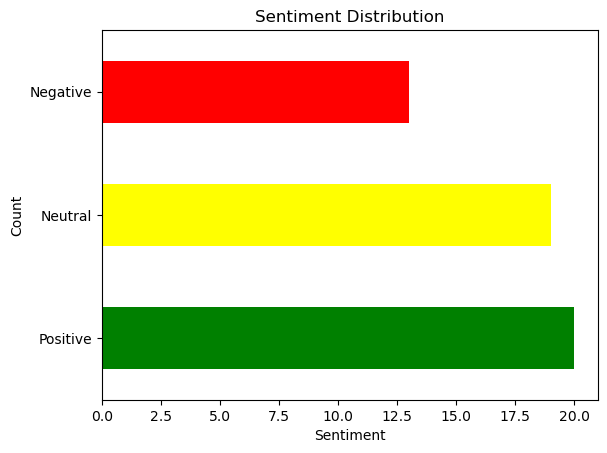

In [103]:
# Distribution of sentiments
sentiment_counts = messages["Sentiment"].value_counts()

# Plotting the bar graph
sentiment_counts.plot(kind='barh', color=['green', 'yellow', 'red'])

# Adding labels and title
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the plot
plt.show()


In [74]:
messages

,Tweet Text,Sentiment,Timestamp,User
0,Our team is excited to introduce our latest pr...,Positive,2023-11-18 8:45:00,@CompanyXYZ
1,We apologize for the inconvenience caused by o...,Negative,2023-11-18 9:30:00,@CompanyXYZ
2,"Neutral on this matter, awaiting further updat...",Neutral,2023-11-18 10:15:00,@CompanyXYZ
3,We're grateful for the continuous support from...,Positive,2023-11-18 11:00:00,@CompanyXYZ
4,Disappointed to announce the delay in the ship...,Negative,2023-11-18 11:45:00,@CompanyXYZ
5,Thrilled about the positive feedback received ...,Positive,2023-11-18 12:30:00,@CompanyXYZ
6,We're striving to provide better services with...,Positive,2023-11-18 13:15:00,@CompanyXYZ
7,The unexpected sale just made our day! #Happiness,Positive,2023-11-18 14:00:00,@CompanyXYZ
8,We understand the concerns raised and are acti...,Neutral,2023-11-18 14:45:00,@CompanyXYZ
9,The team is frustrated with the recurring syst...,Negative,2023-11-18 15:30:00,@CompanyXYZ


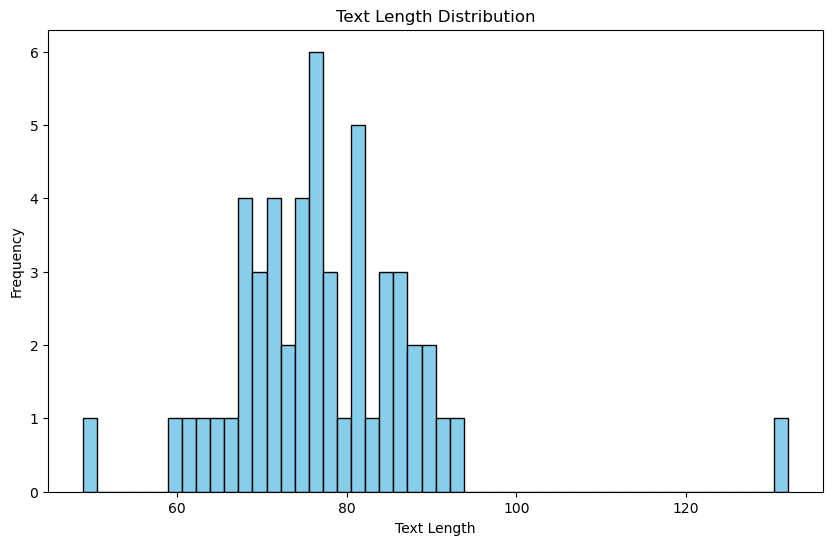

In [102]:
# Adding a new column to explore text lengths
messages['Text_Length'] = messages['Tweet Text'].apply(len)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(messages['Text_Length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

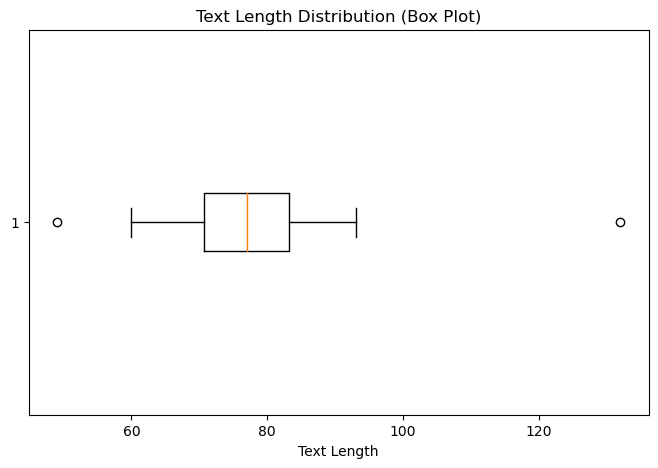

In [104]:
# Plotting box plot for outliers with more than the average words
plt.figure(figsize=(8, 5))
plt.boxplot(messages['Text_Length'], vert=False)
plt.title('Text Length Distribution (Box Plot)')
plt.xlabel('Text Length')
plt.show()

In [105]:
messages.columns

Index(['Tweet Text', 'Sentiment', 'Timestamp', 'User', 'Text_Length'], dtype='object')

In [106]:
messages

,Tweet Text,Sentiment,Timestamp,User,Text_Length
0,Our team is excited to introduce our latest pr...,Positive,2023-11-18 08:45:00,@CompanyXYZ,81
1,We apologize for the inconvenience caused by o...,Negative,2023-11-18 09:30:00,@CompanyXYZ,132
2,"Neutral on this matter, awaiting further updat...",Neutral,2023-11-18 10:15:00,@CompanyXYZ,63
3,We're grateful for the continuous support from...,Positive,2023-11-18 11:00:00,@CompanyXYZ,78
4,Disappointed to announce the delay in the ship...,Negative,2023-11-18 11:45:00,@CompanyXYZ,81
5,Thrilled about the positive feedback received ...,Positive,2023-11-18 12:30:00,@CompanyXYZ,93
6,We're striving to provide better services with...,Positive,2023-11-18 13:15:00,@CompanyXYZ,77
7,The unexpected sale just made our day! #Happiness,Positive,2023-11-18 14:00:00,@CompanyXYZ,49
8,We understand the concerns raised and are acti...,Neutral,2023-11-18 14:45:00,@CompanyXYZ,89
9,The team is frustrated with the recurring syst...,Negative,2023-11-18 15:30:00,@CompanyXYZ,75


# Preprocessing and Anlaysis

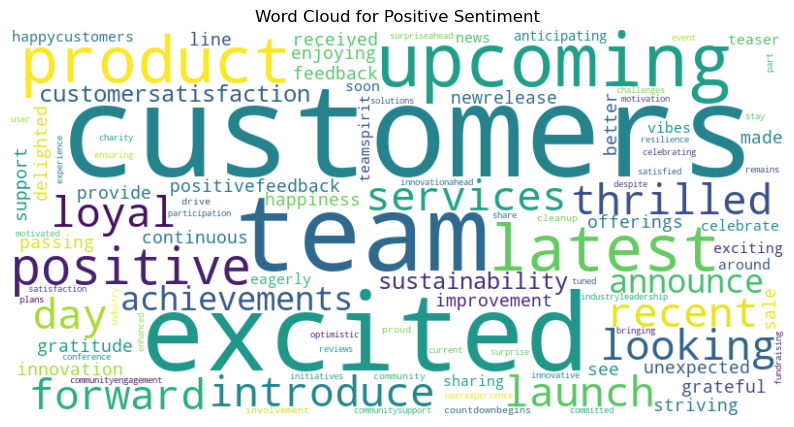

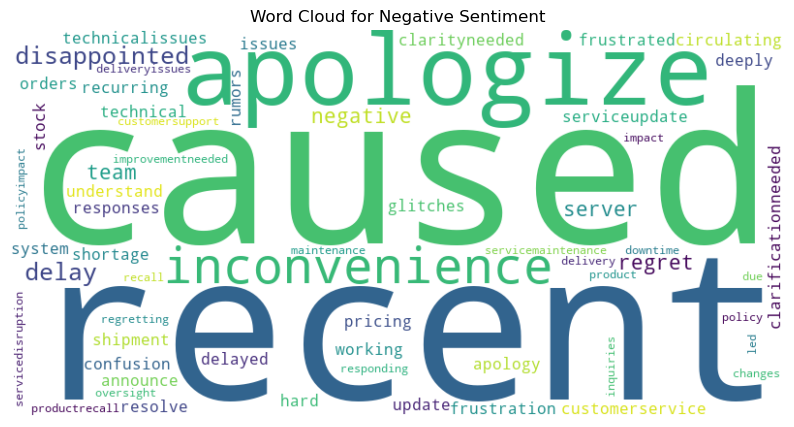

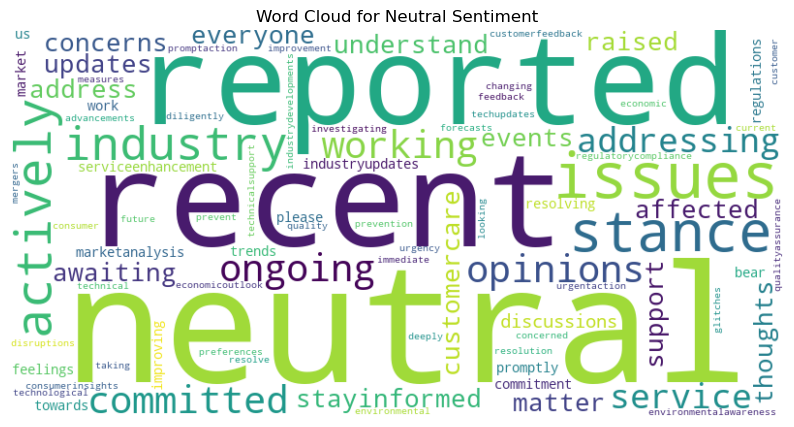

In [108]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Function to preprocess text

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords and non-alphabetic words
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    
    return words

# Create a WordCloud for each sentiment class
sentiments = df['Sentiment'].unique()

for sentiment in sentiments:
    # Filter the DataFrame for the current sentiment
    sentiment_df = df[df['Sentiment'] == sentiment]
    
    # Combine all text samples into a single string
    combined_text = ' '.join(sentiment_df['Tweet Text'])
    
    processed_words = preprocess_text(combined_text)
    
    # Creating WordCloud to better express the words
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(processed_words))
    
    # Ploting WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()


# Stopword Analysis

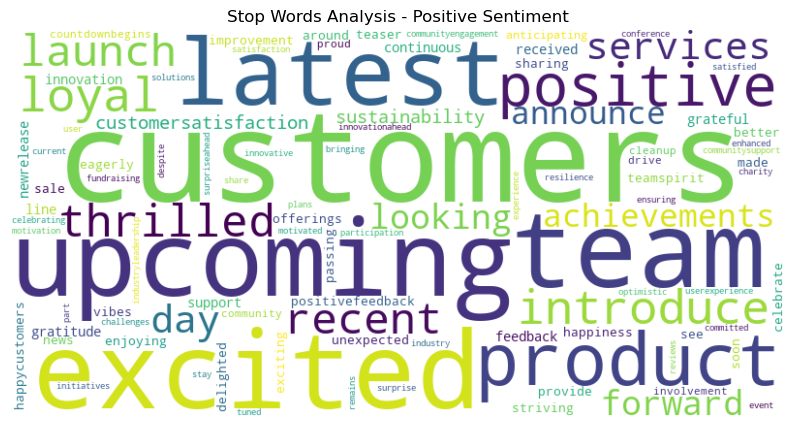

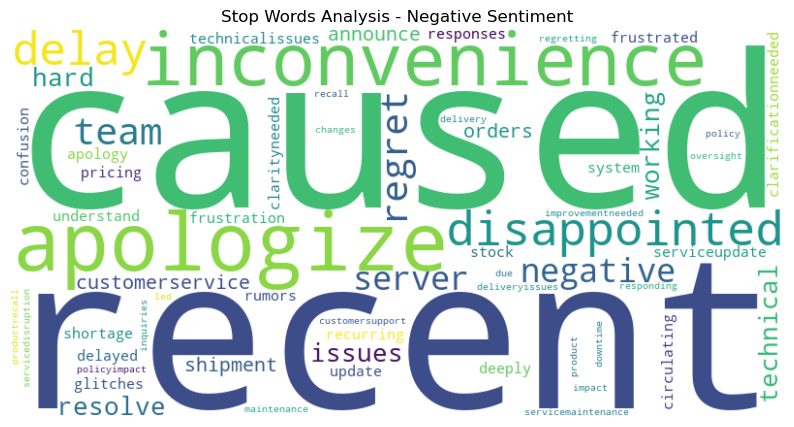

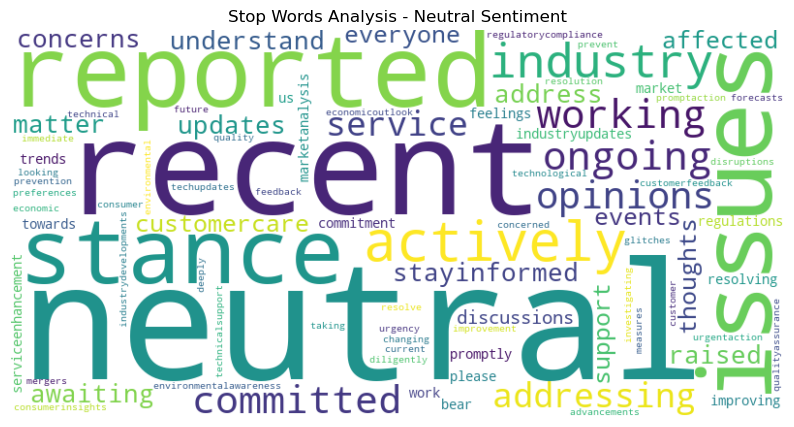

In [80]:
# Analyzing stopwords based on sentiment and plotting it with wordcloud

def stop_words_analysis(text, sentiment):
    stop_words = set(stopwords.words('english'))
    
    # Tokenize the text
    words = word_tokenize(text.lower())  # Convert to lowercase for consistency
    
    # Remove stop words
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    
    # Plot word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Stop Words Analysis - {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

# Example usage
sentiments = df['Sentiment'].unique()

for sentiment in sentiments:
    sentiment_df = df[df['Sentiment'] == sentiment]
    combined_text = ' '.join(sentiment_df['Tweet Text'])
    stop_words_analysis(combined_text, sentiment)

Stopword analysis for Tweet 1 (Sentiment: Positive):


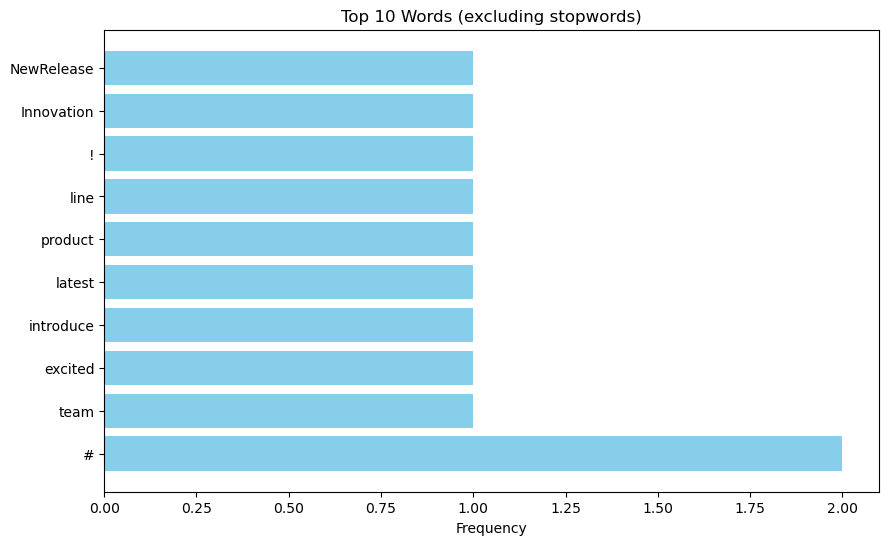

--------------------------------------------------
Stopword analysis for Tweet 2 (Sentiment: Negative):


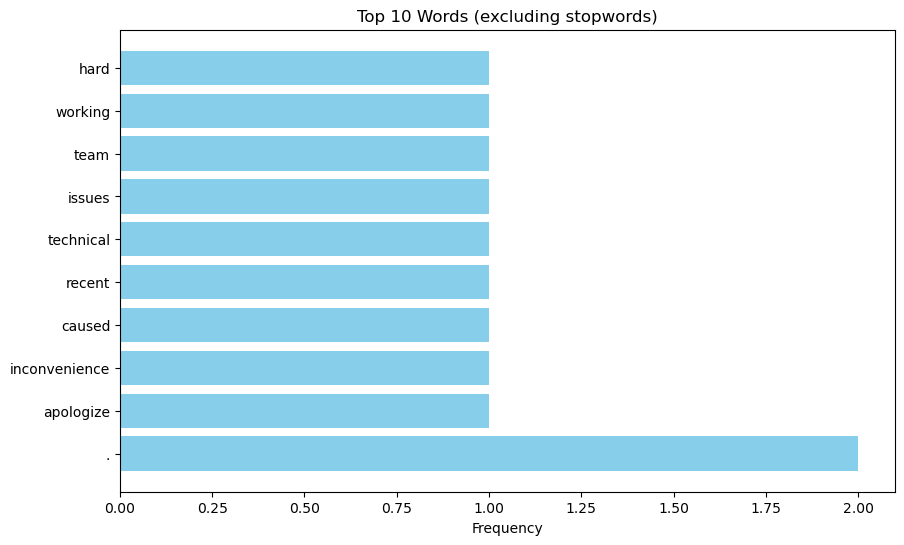

--------------------------------------------------
Stopword analysis for Tweet 3 (Sentiment: Neutral):


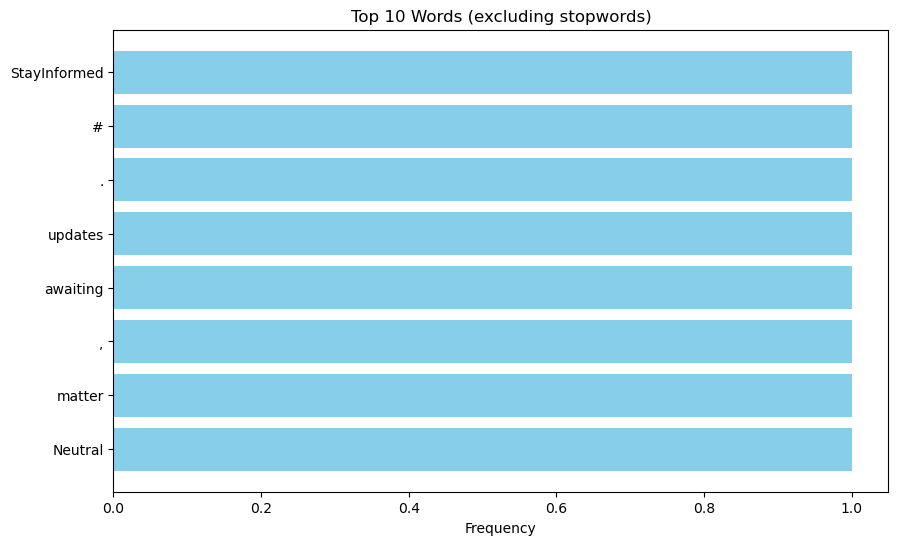

--------------------------------------------------
Stopword analysis for Tweet 4 (Sentiment: Positive):


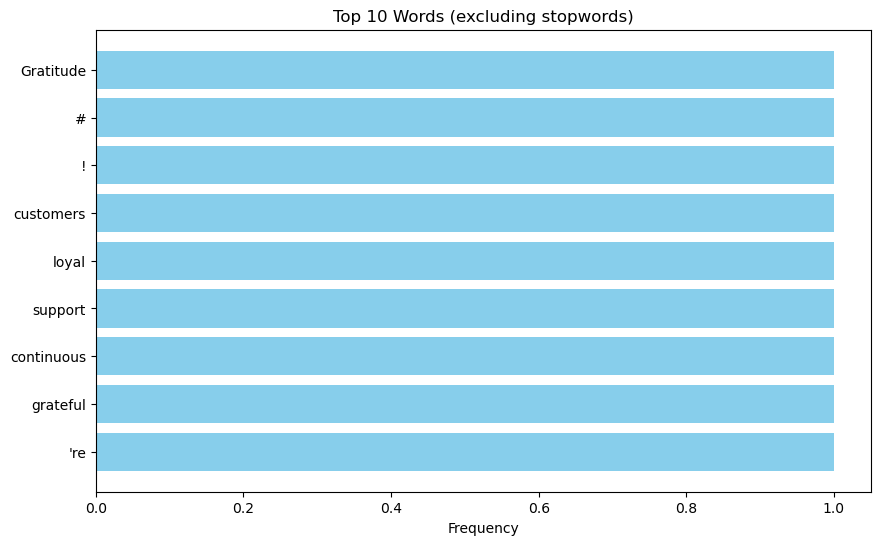

--------------------------------------------------
Stopword analysis for Tweet 5 (Sentiment: Negative):


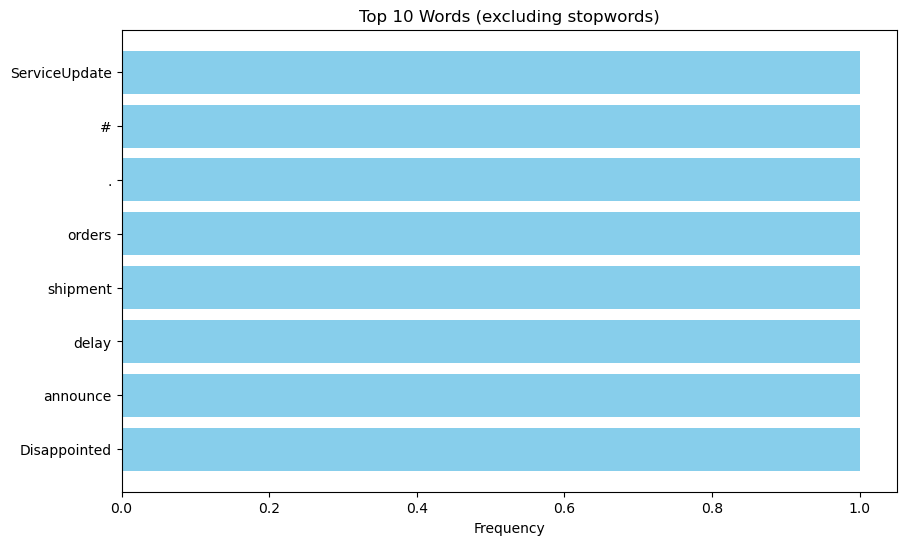

--------------------------------------------------
Stopword analysis for Tweet 6 (Sentiment: Positive):


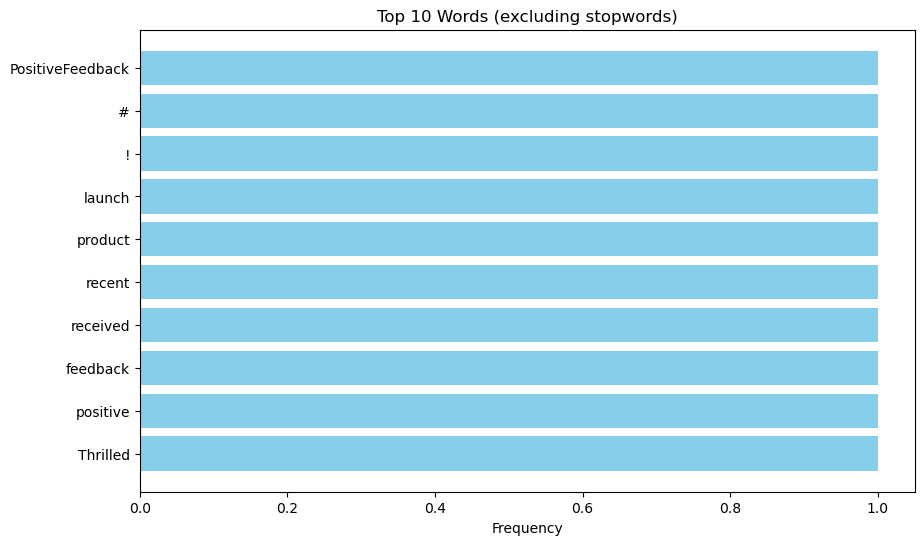

--------------------------------------------------
Stopword analysis for Tweet 7 (Sentiment: Positive):


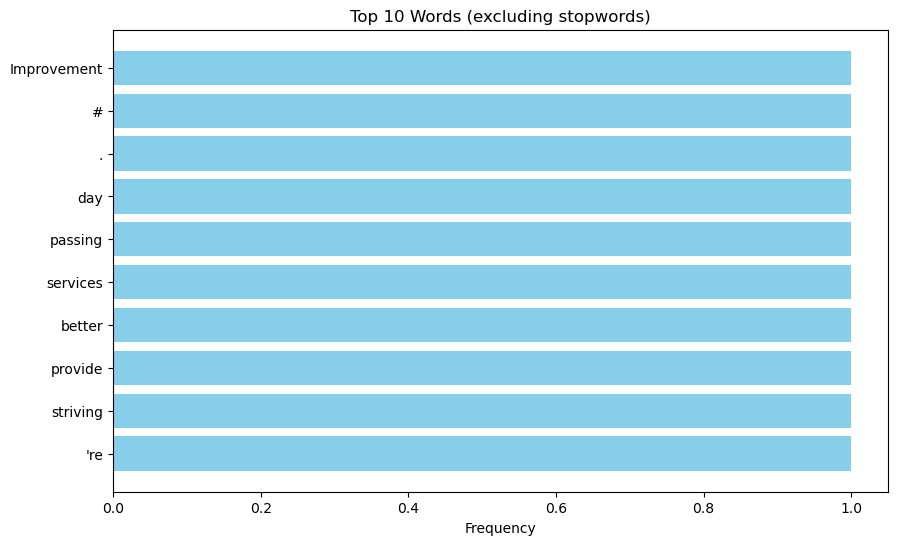

--------------------------------------------------
Stopword analysis for Tweet 8 (Sentiment: Positive):


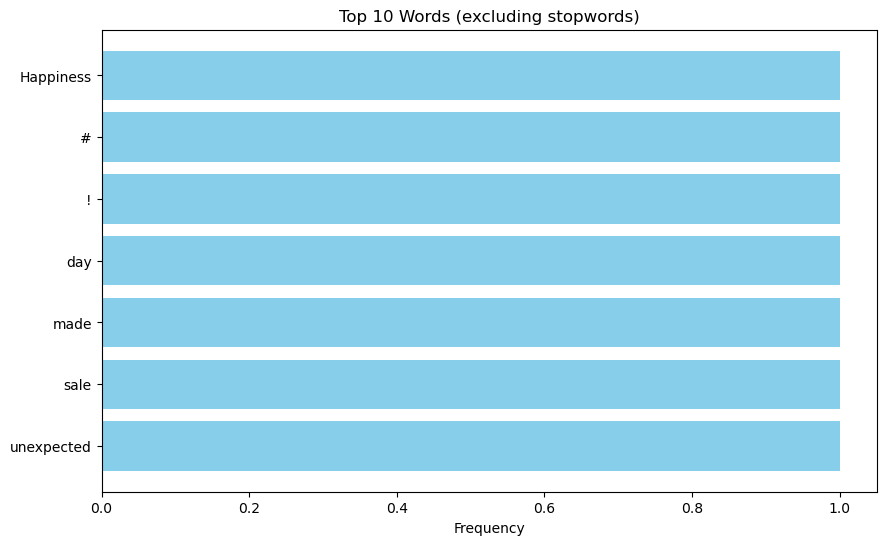

--------------------------------------------------
Stopword analysis for Tweet 9 (Sentiment: Neutral):


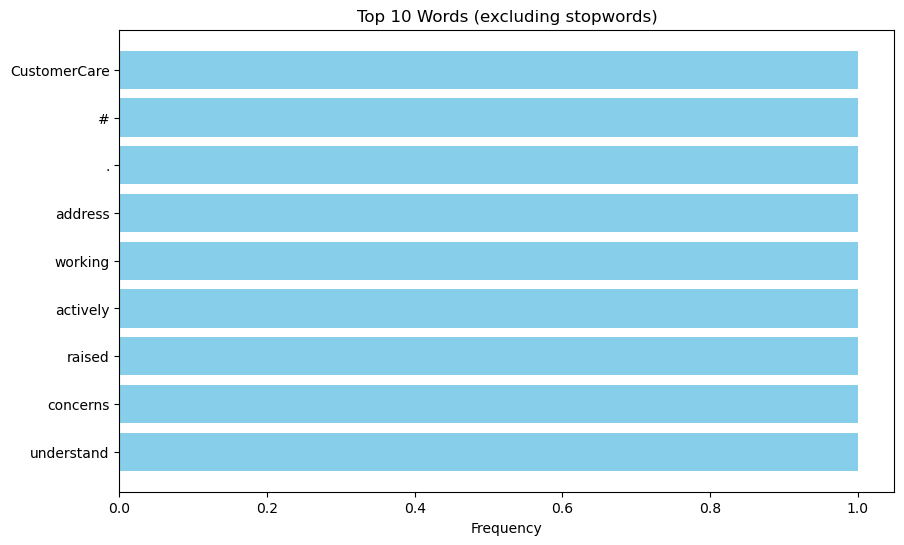

--------------------------------------------------
Stopword analysis for Tweet 10 (Sentiment: Negative):


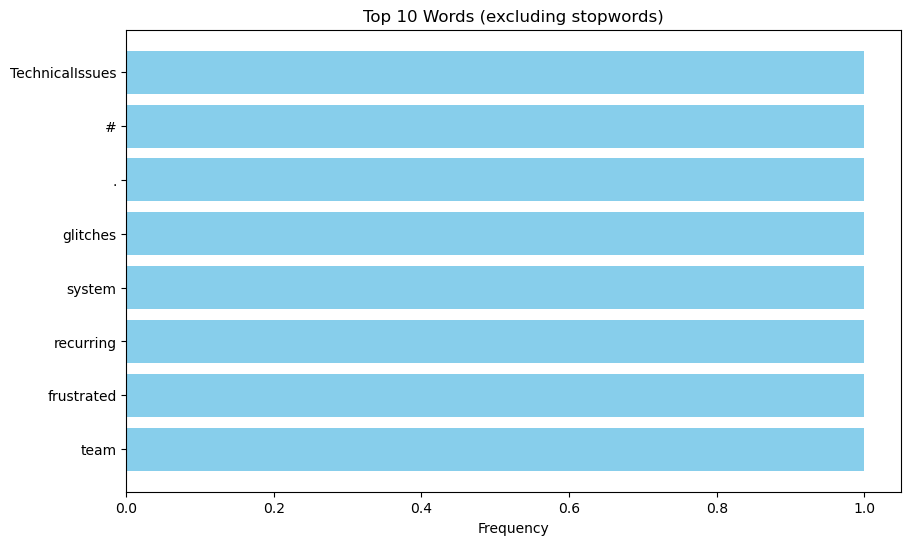

--------------------------------------------------
Stopword analysis for Tweet 11 (Sentiment: Neutral):


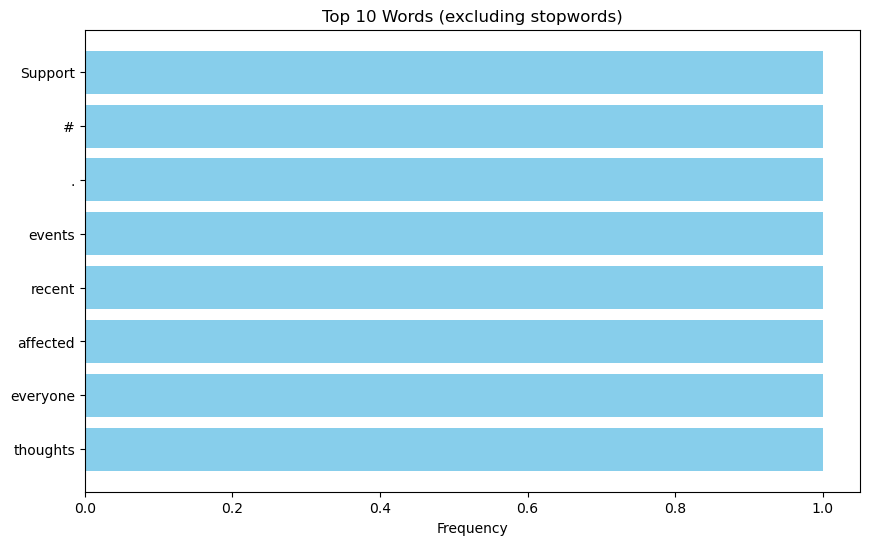

--------------------------------------------------
Stopword analysis for Tweet 12 (Sentiment: Positive):


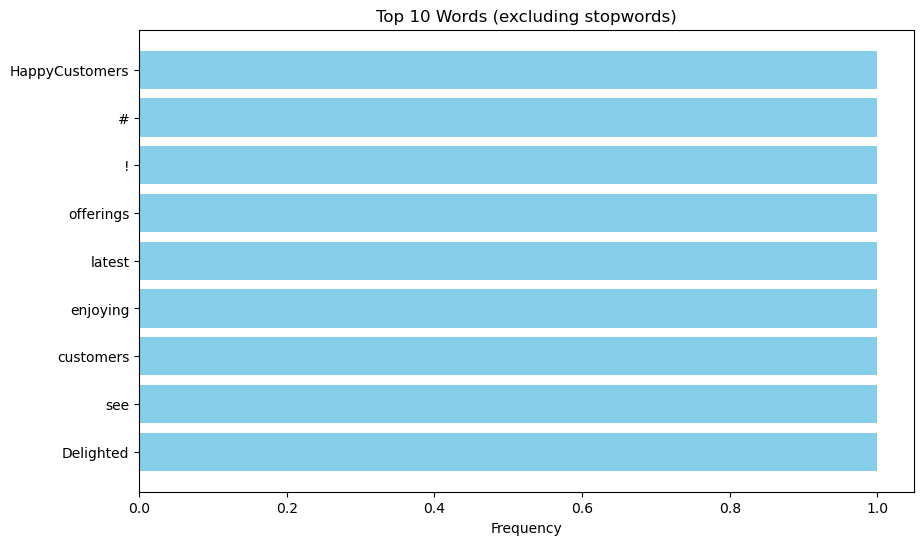

--------------------------------------------------
Stopword analysis for Tweet 13 (Sentiment: Negative):


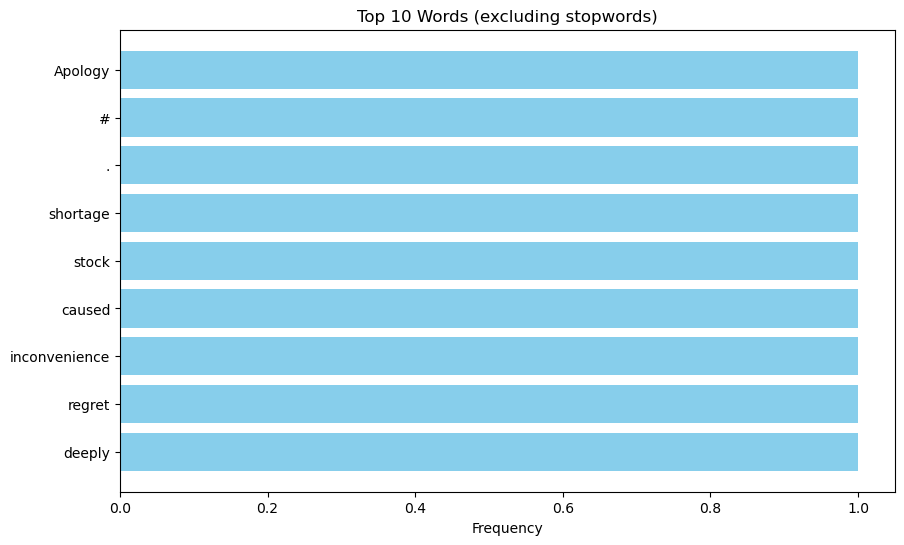

--------------------------------------------------
Stopword analysis for Tweet 14 (Sentiment: Neutral):


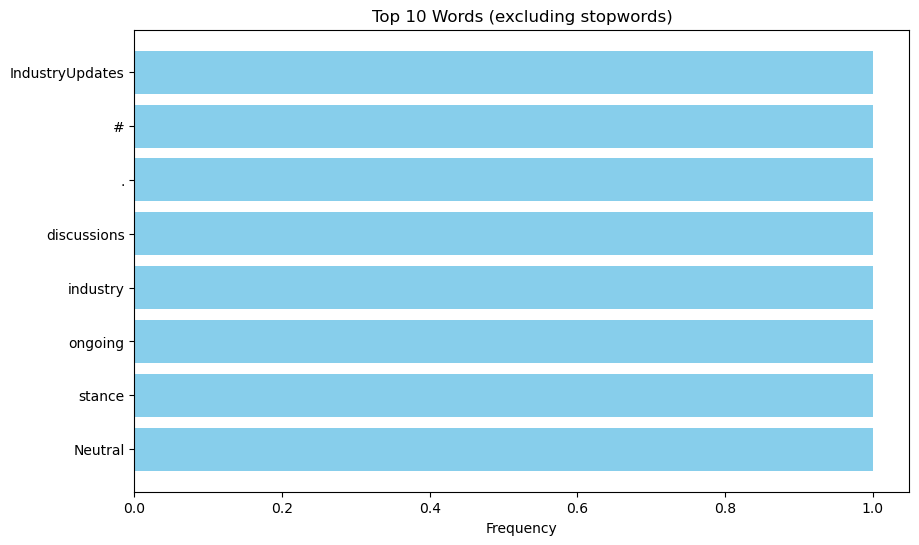

--------------------------------------------------
Stopword analysis for Tweet 15 (Sentiment: Positive):


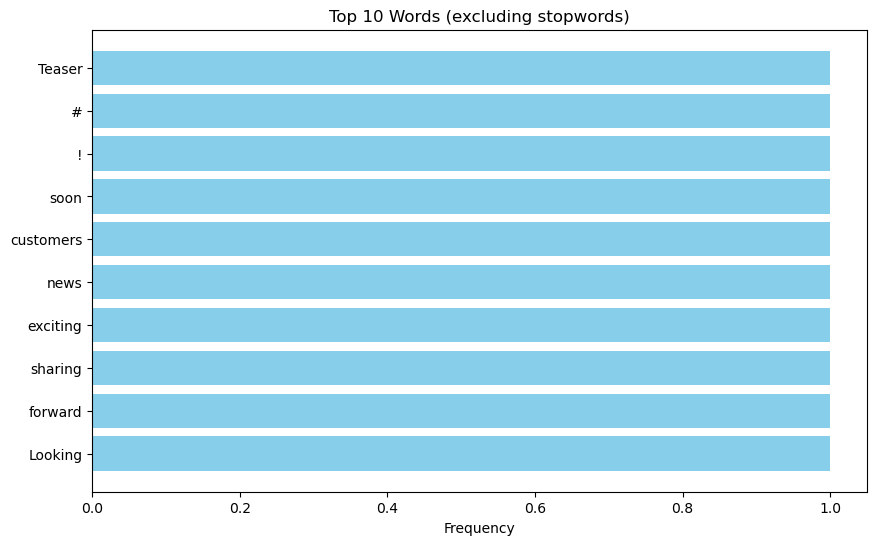

--------------------------------------------------
Stopword analysis for Tweet 16 (Sentiment: Negative):


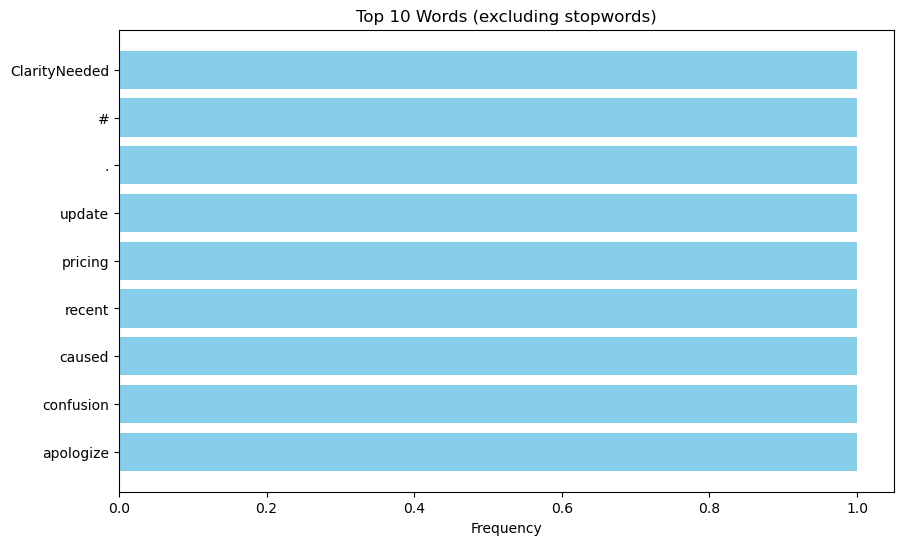

--------------------------------------------------
Stopword analysis for Tweet 17 (Sentiment: Positive):


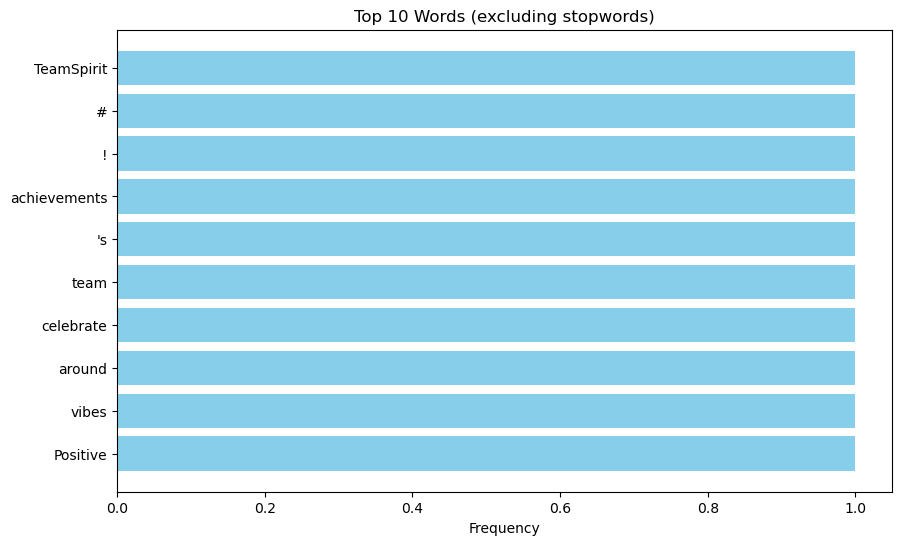

--------------------------------------------------
Stopword analysis for Tweet 18 (Sentiment: Neutral):


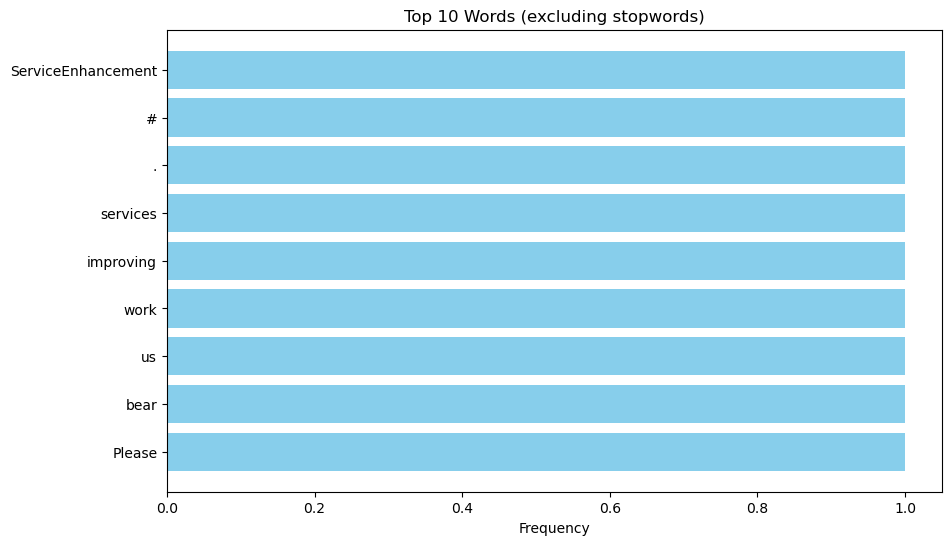

--------------------------------------------------
Stopword analysis for Tweet 19 (Sentiment: Negative):


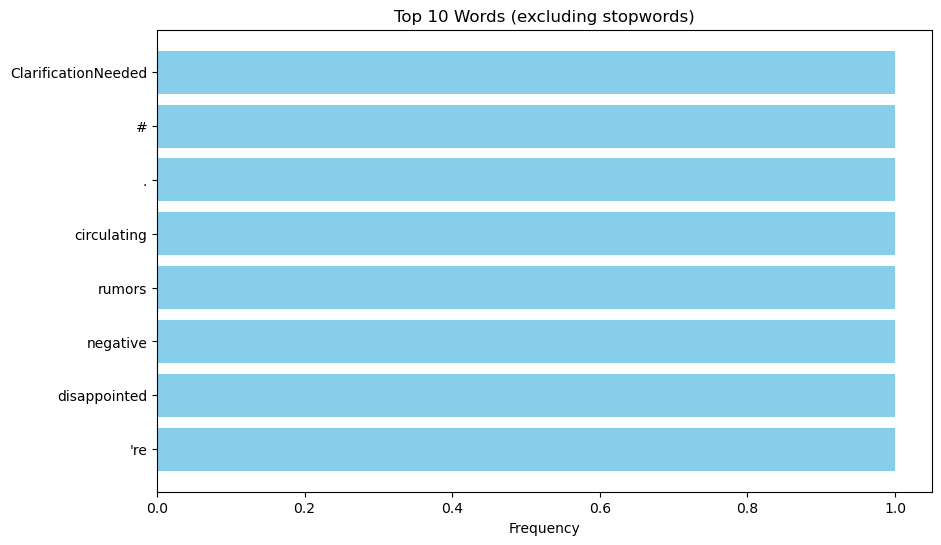

--------------------------------------------------
Stopword analysis for Tweet 20 (Sentiment: Neutral):


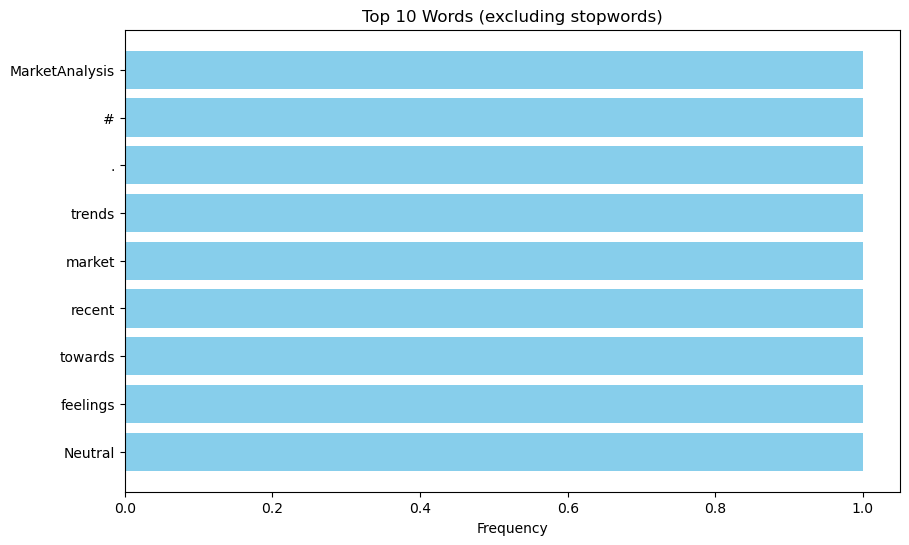

--------------------------------------------------
Stopword analysis for Tweet 21 (Sentiment: Positive):


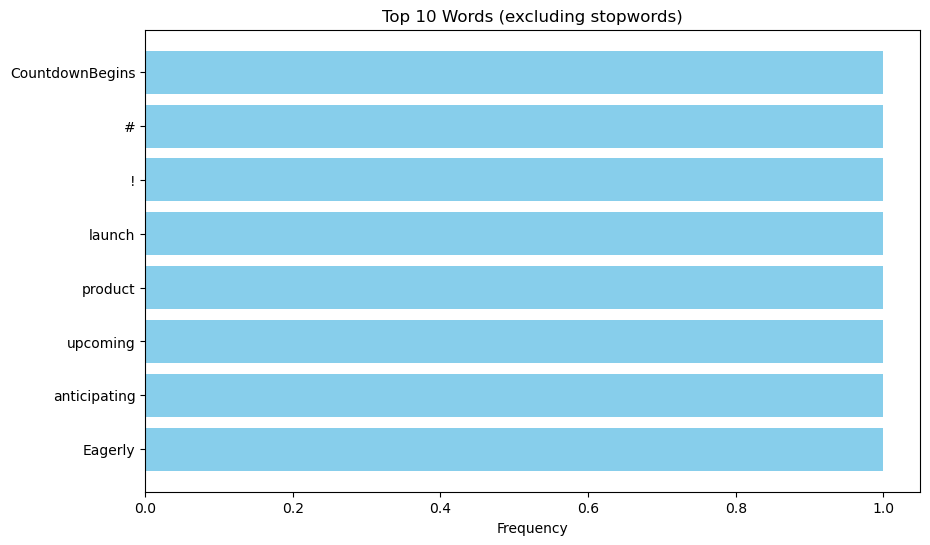

--------------------------------------------------
Stopword analysis for Tweet 22 (Sentiment: Neutral):


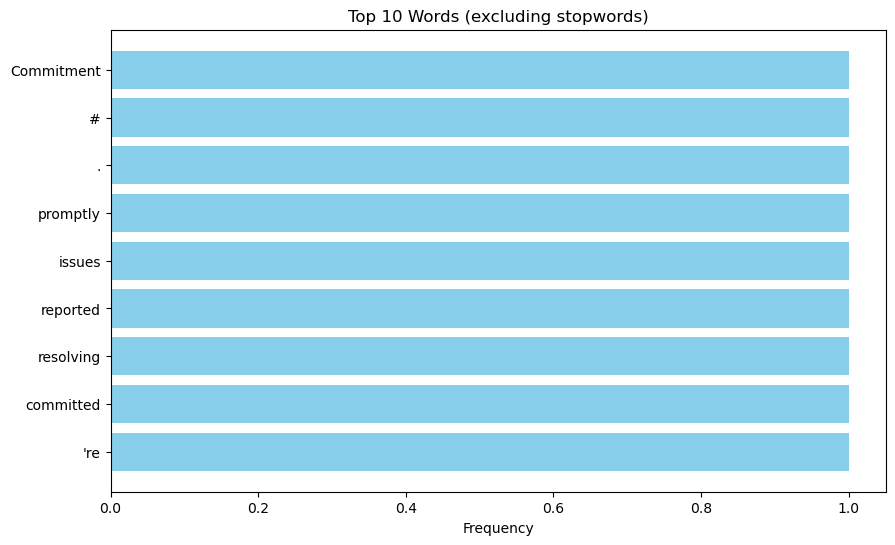

--------------------------------------------------
Stopword analysis for Tweet 23 (Sentiment: Positive):


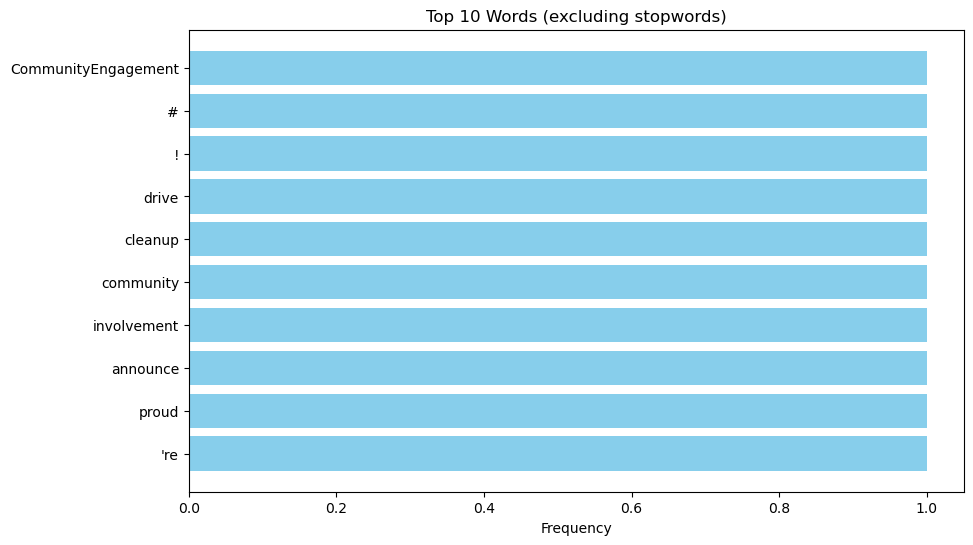

--------------------------------------------------
Stopword analysis for Tweet 24 (Sentiment: Negative):


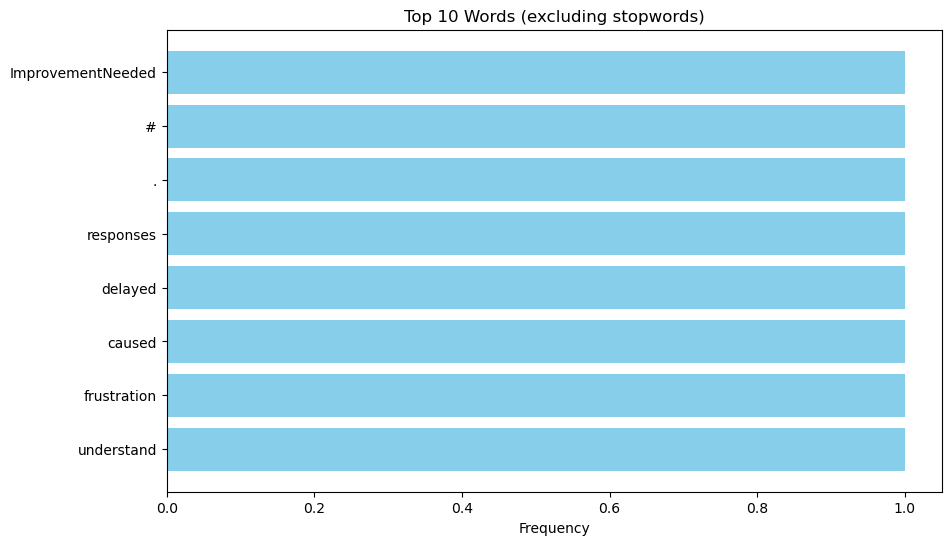

--------------------------------------------------
Stopword analysis for Tweet 25 (Sentiment: Neutral):


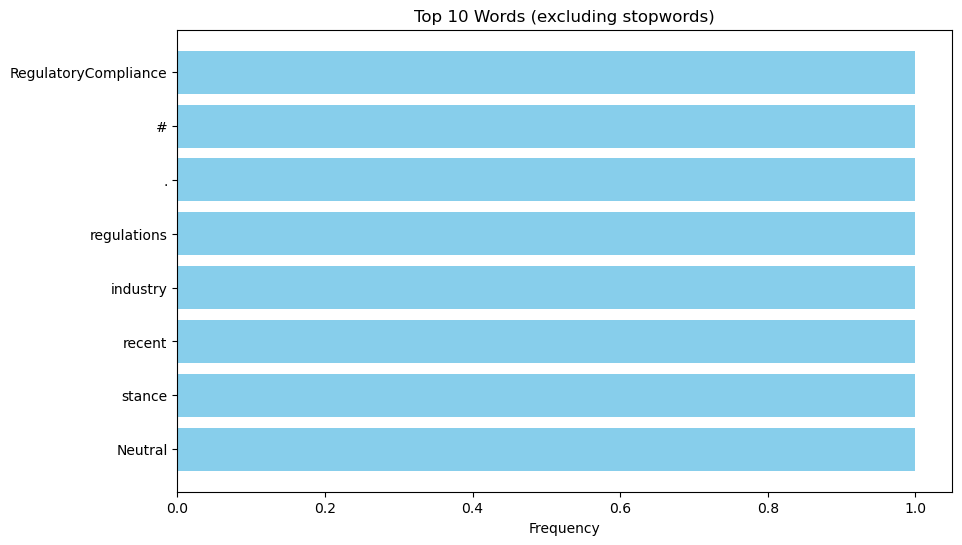

--------------------------------------------------
Stopword analysis for Tweet 26 (Sentiment: Positive):


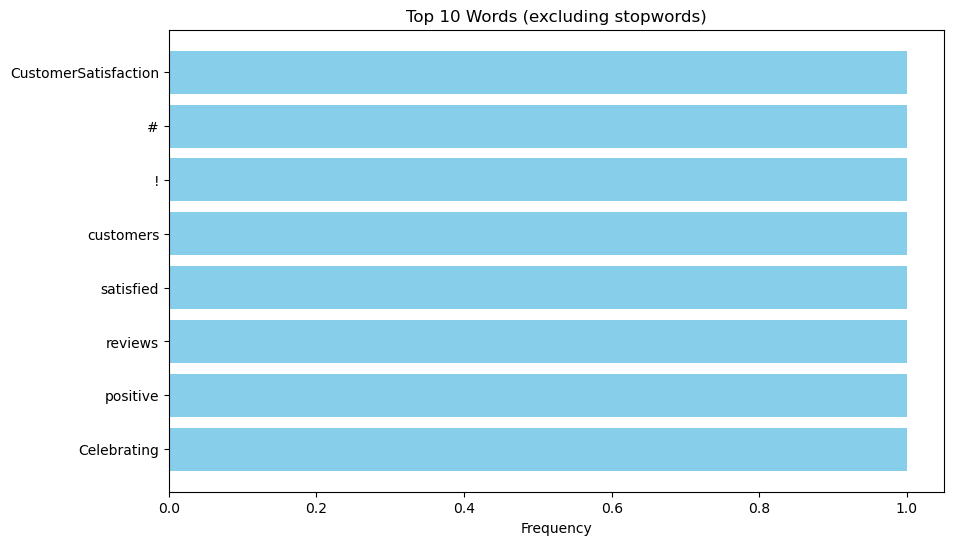

--------------------------------------------------
Stopword analysis for Tweet 27 (Sentiment: Negative):


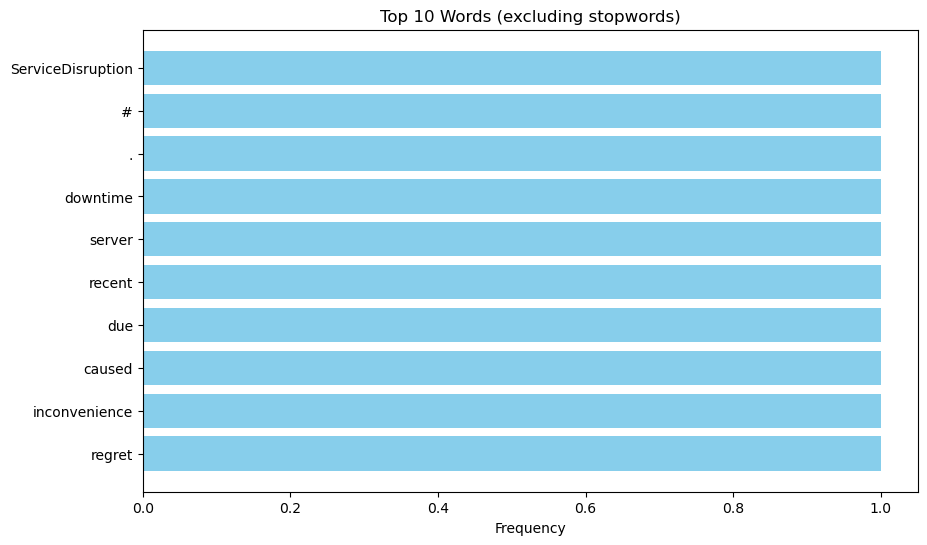

--------------------------------------------------
Stopword analysis for Tweet 28 (Sentiment: Positive):


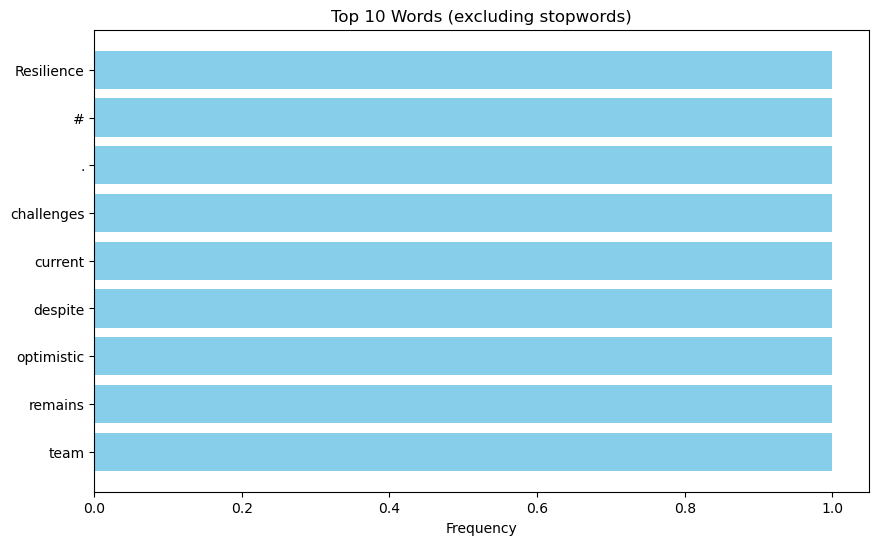

--------------------------------------------------
Stopword analysis for Tweet 29 (Sentiment: Neutral):


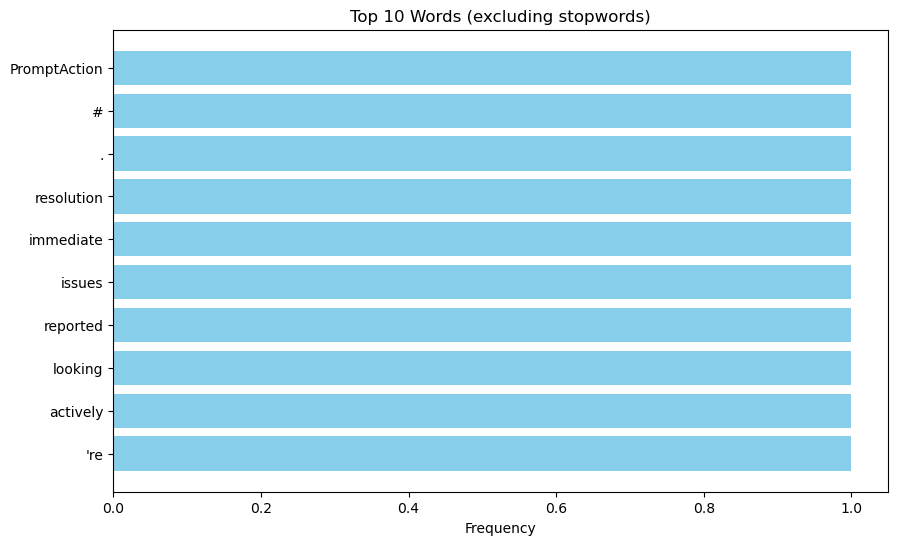

--------------------------------------------------
Stopword analysis for Tweet 30 (Sentiment: Negative):


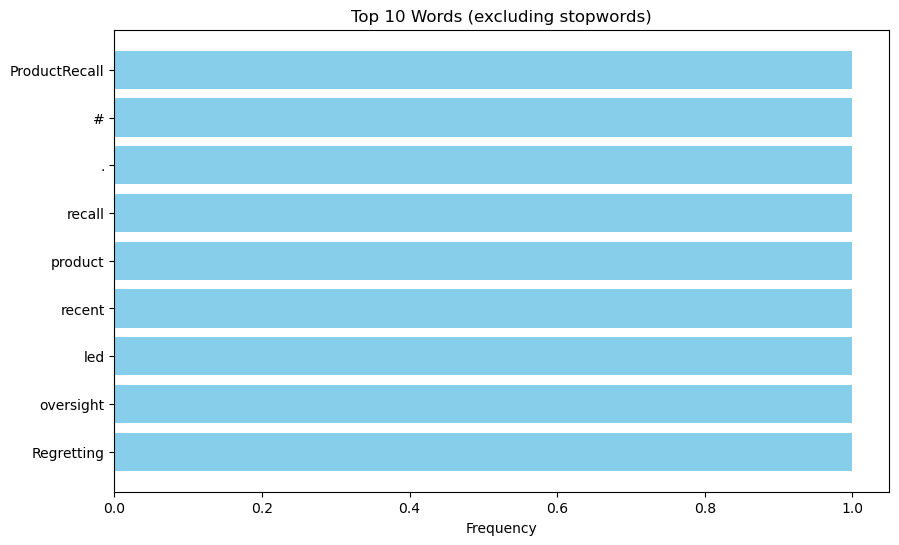

--------------------------------------------------
Stopword analysis for Tweet 31 (Sentiment: Neutral):


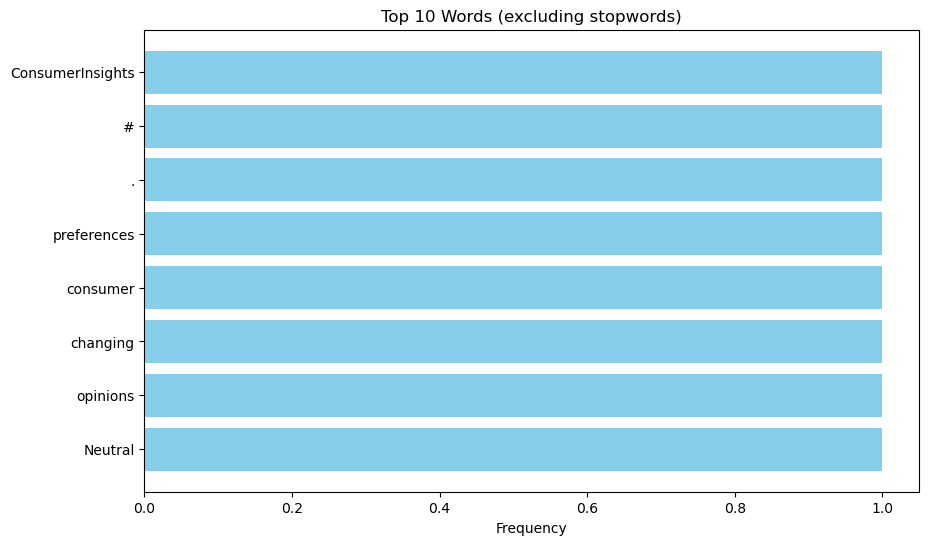

--------------------------------------------------
Stopword analysis for Tweet 32 (Sentiment: Positive):


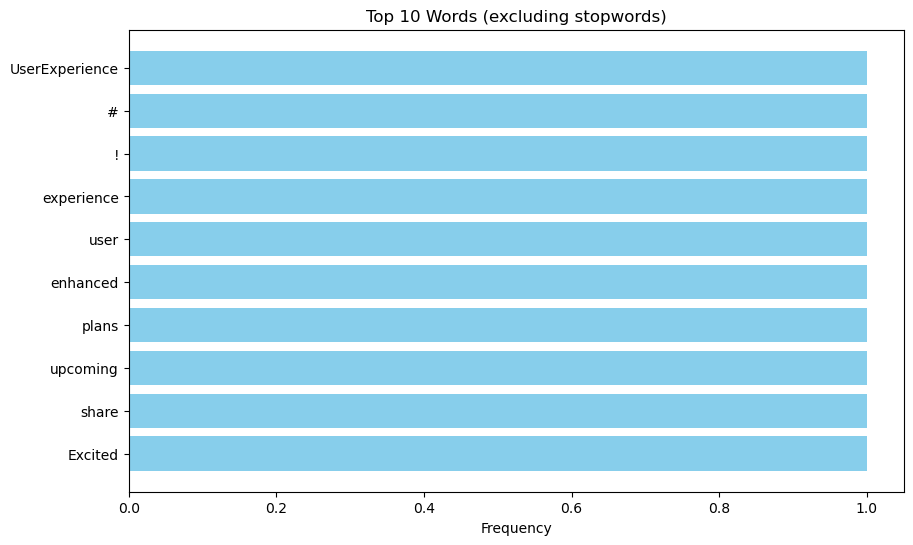

--------------------------------------------------
Stopword analysis for Tweet 33 (Sentiment: Negative):


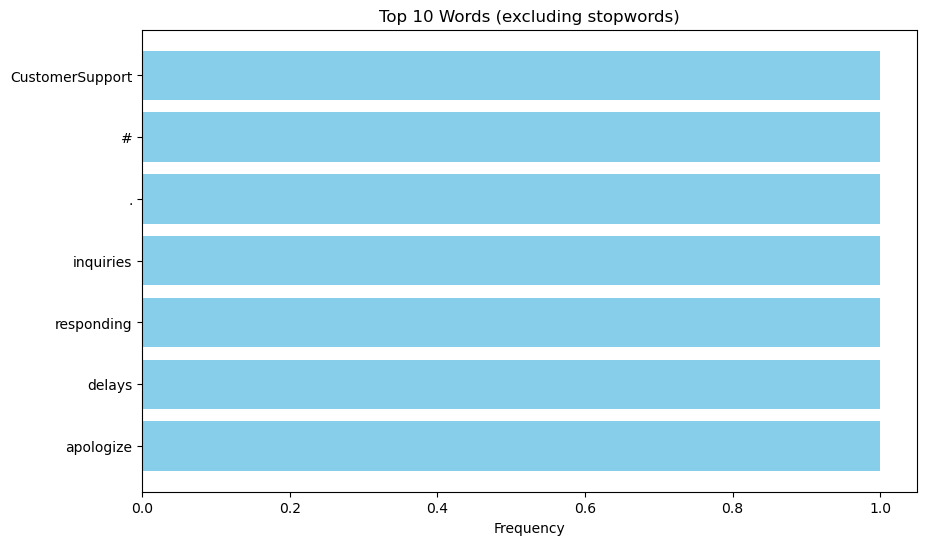

--------------------------------------------------
Stopword analysis for Tweet 34 (Sentiment: Neutral):


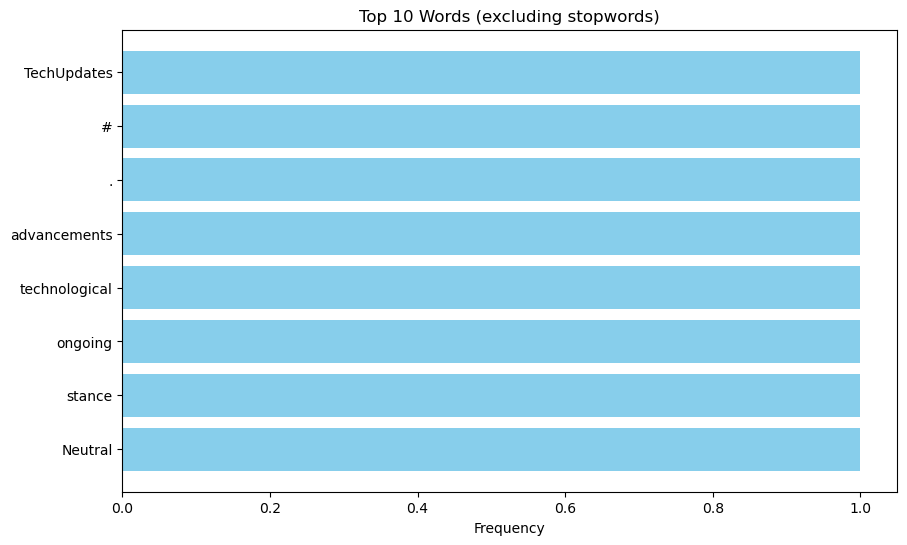

--------------------------------------------------
Stopword analysis for Tweet 35 (Sentiment: Positive):


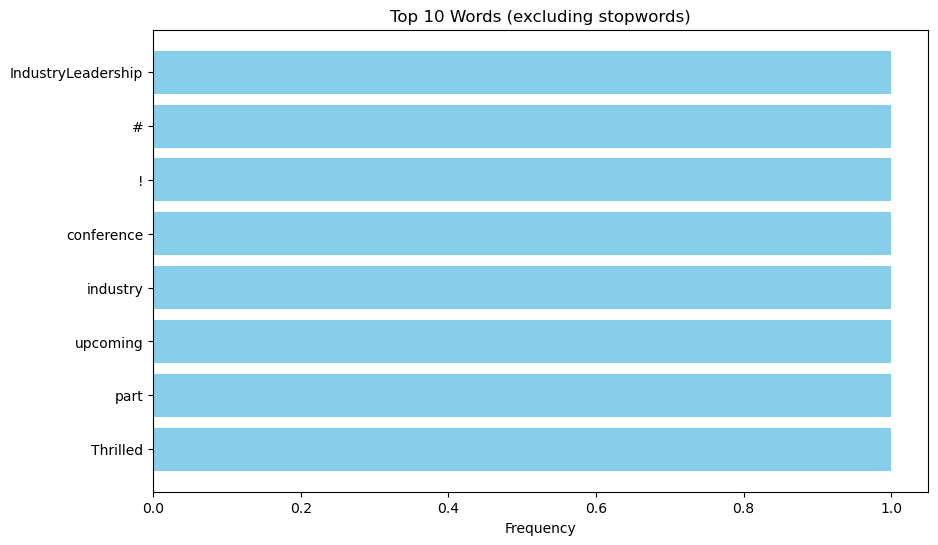

--------------------------------------------------
Stopword analysis for Tweet 36 (Sentiment: Positive):


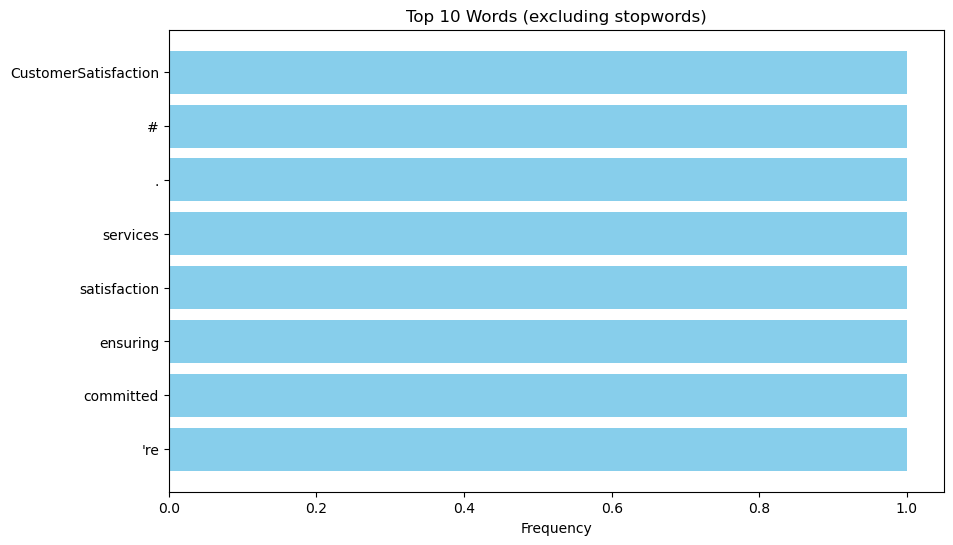

--------------------------------------------------
Stopword analysis for Tweet 37 (Sentiment: Neutral):


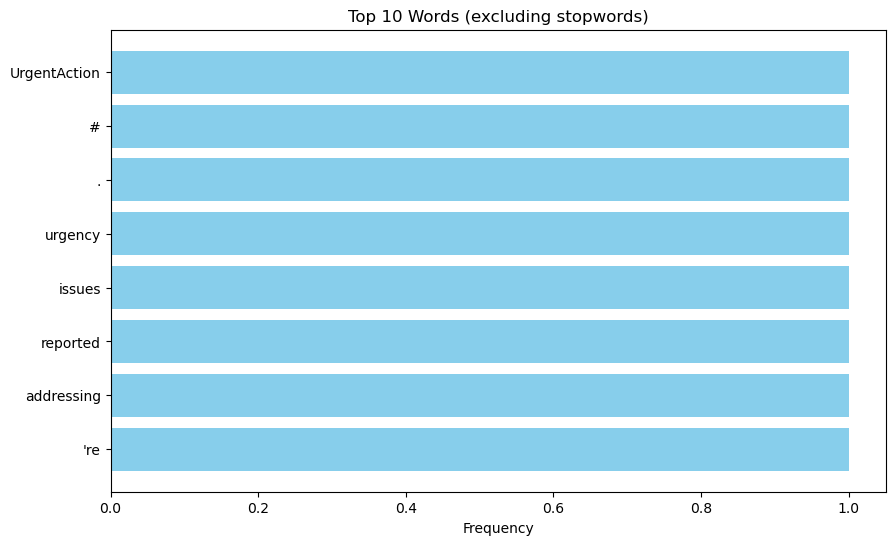

--------------------------------------------------
Stopword analysis for Tweet 38 (Sentiment: Neutral):


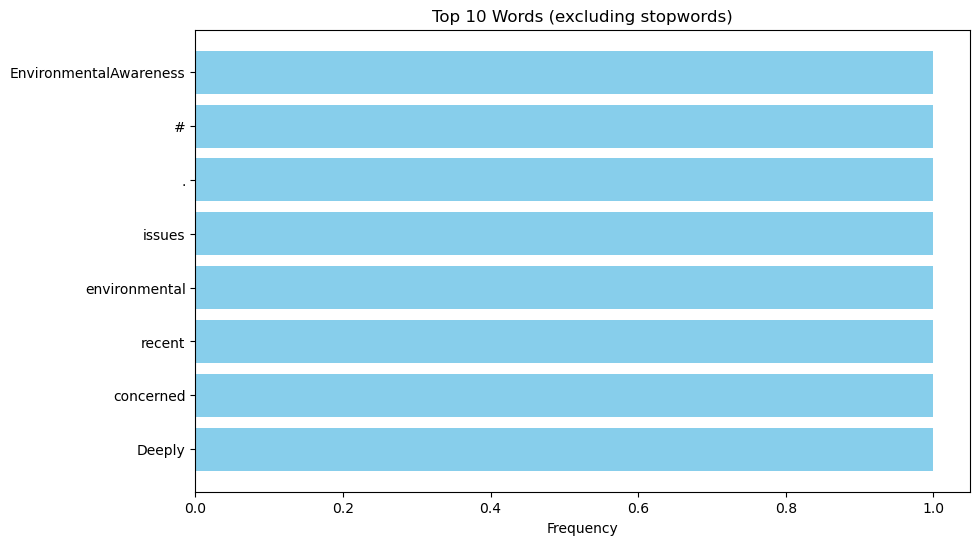

--------------------------------------------------
Stopword analysis for Tweet 39 (Sentiment: Positive):


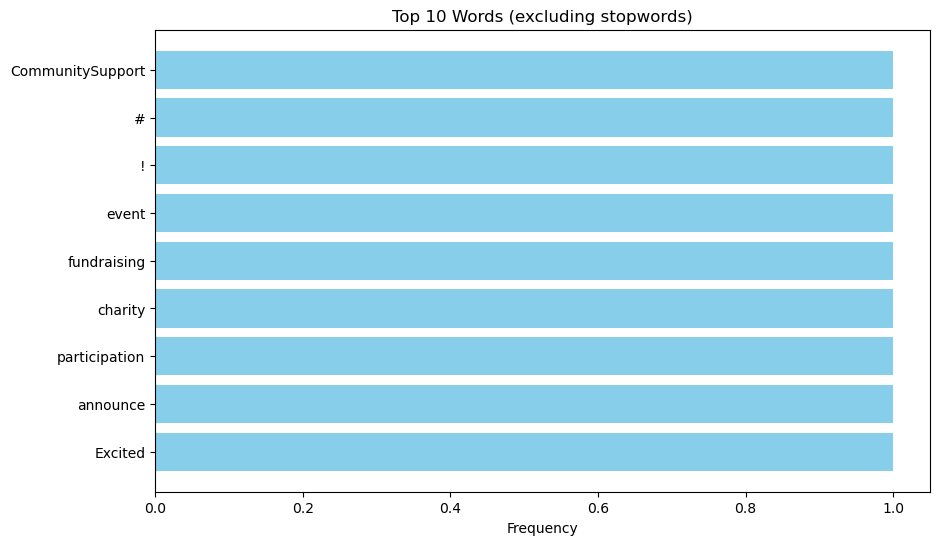

--------------------------------------------------
Stopword analysis for Tweet 40 (Sentiment: Neutral):


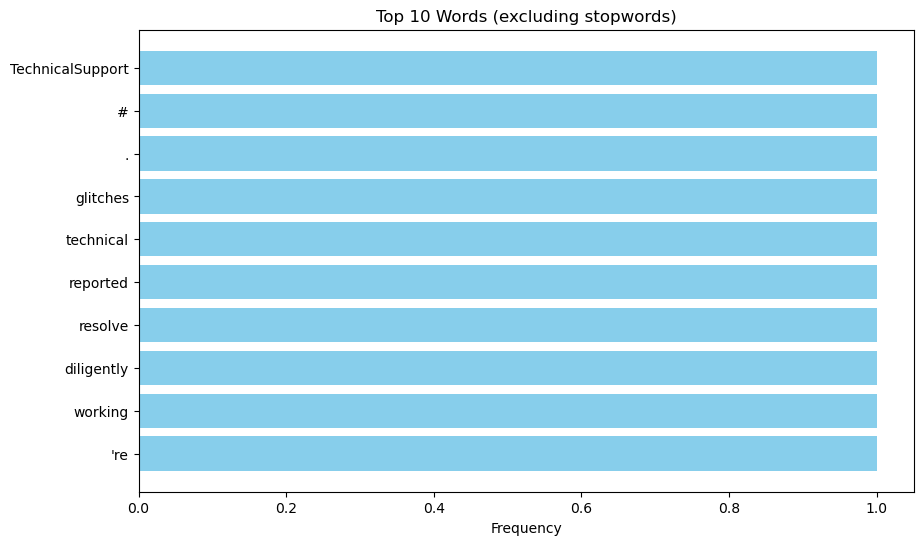

--------------------------------------------------
Stopword analysis for Tweet 41 (Sentiment: Negative):


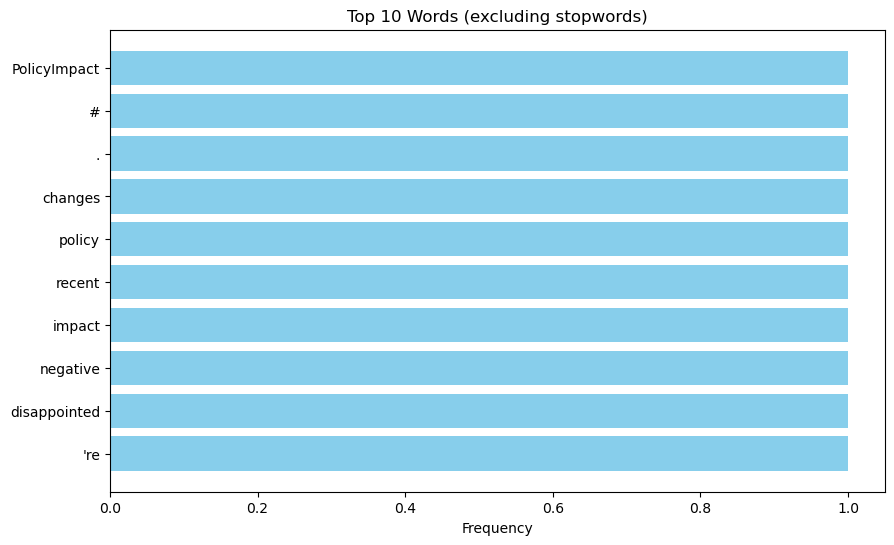

--------------------------------------------------
Stopword analysis for Tweet 42 (Sentiment: Neutral):


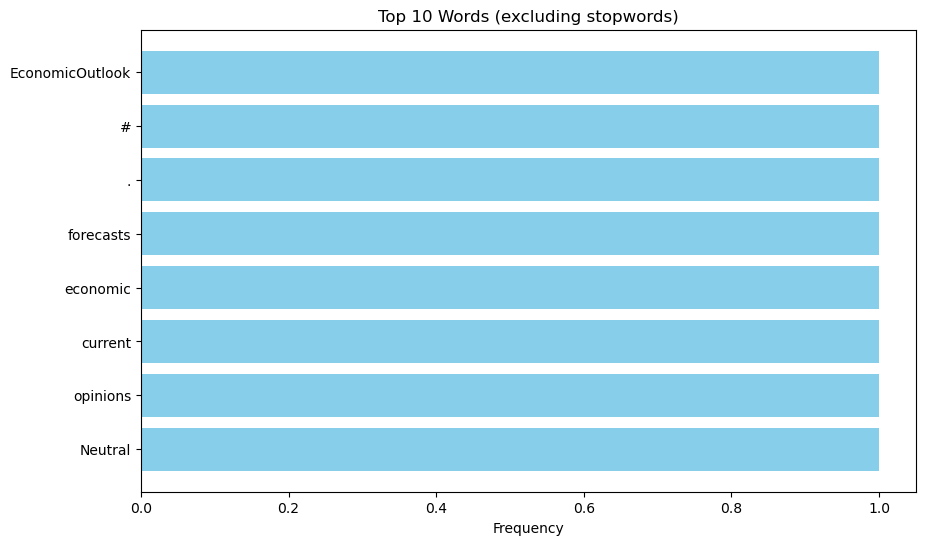

--------------------------------------------------
Stopword analysis for Tweet 43 (Sentiment: Positive):


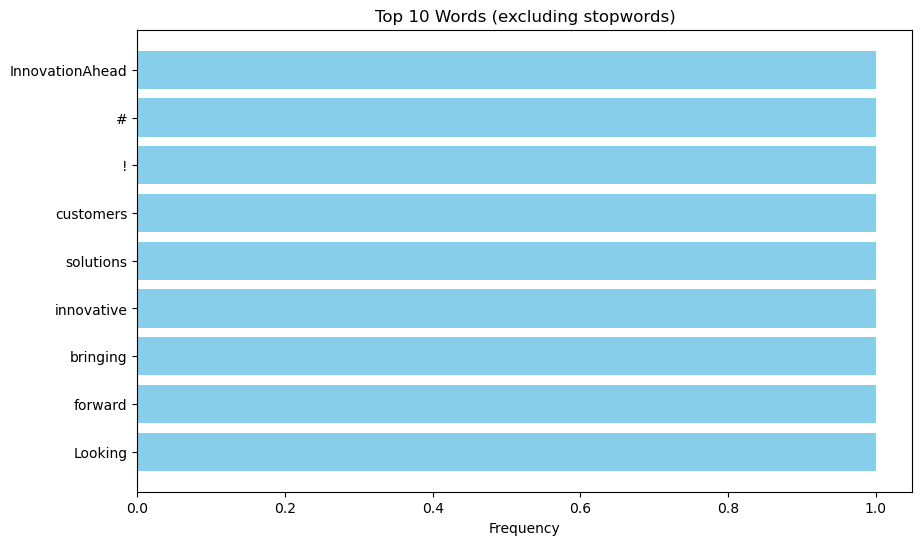

--------------------------------------------------
Stopword analysis for Tweet 44 (Sentiment: Negative):


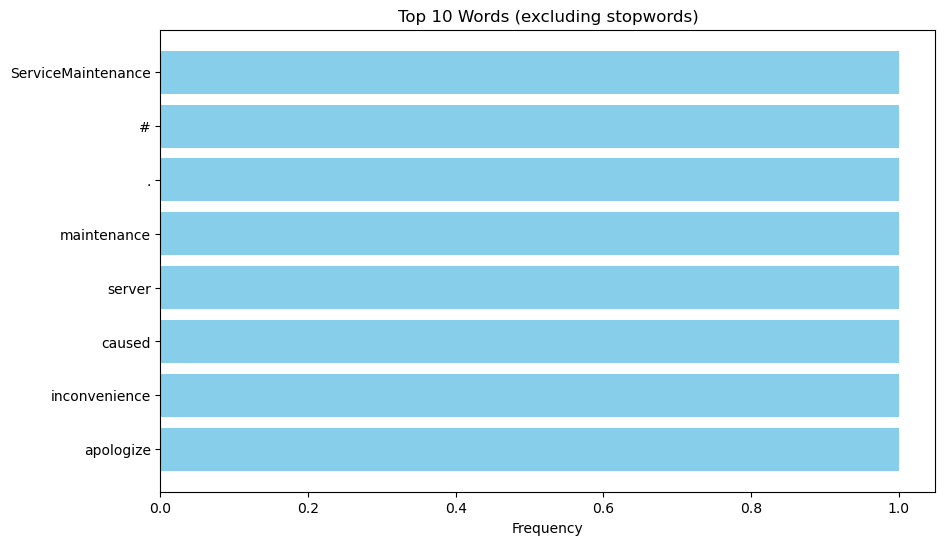

--------------------------------------------------
Stopword analysis for Tweet 45 (Sentiment: Positive):


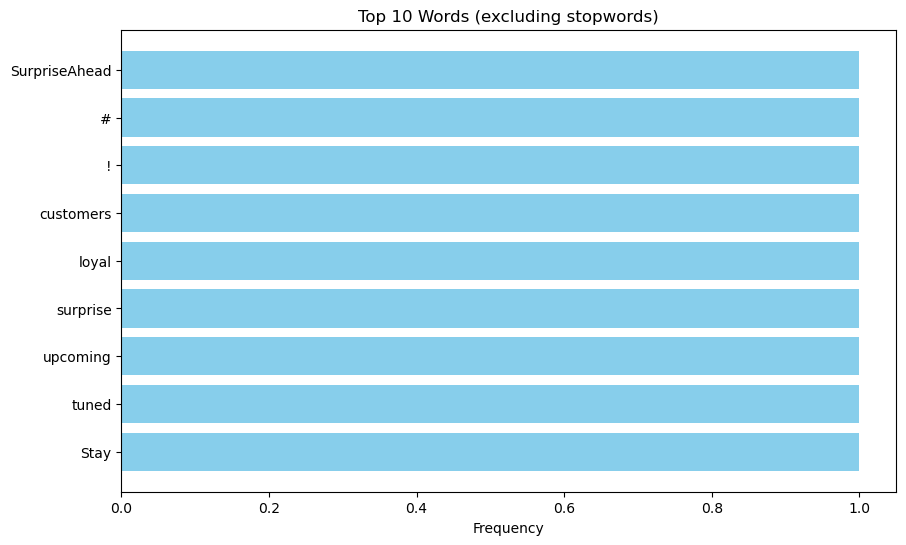

--------------------------------------------------
Stopword analysis for Tweet 46 (Sentiment: Neutral):


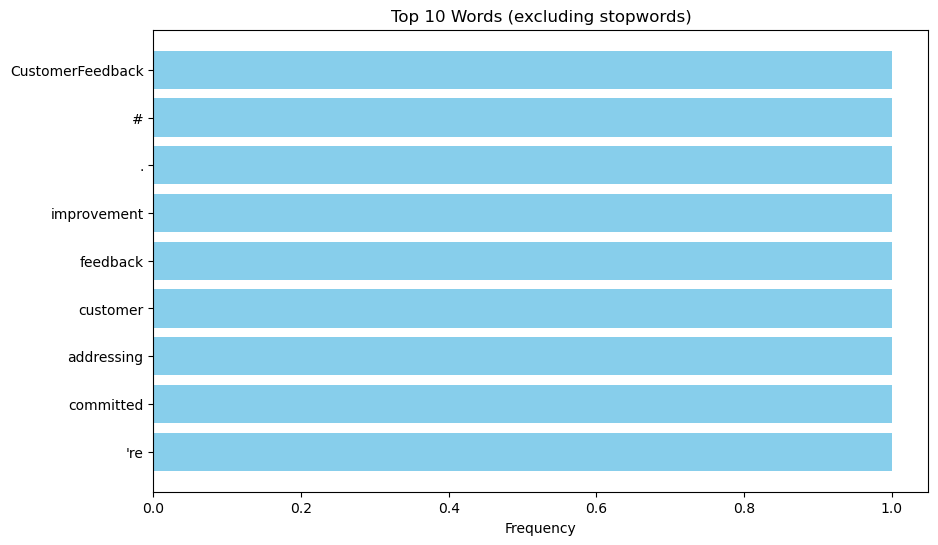

--------------------------------------------------
Stopword analysis for Tweet 47 (Sentiment: Positive):


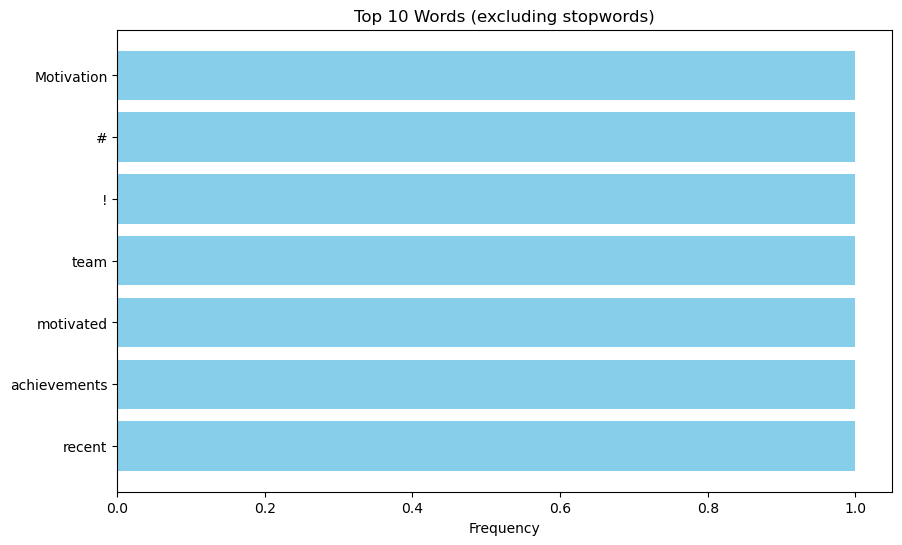

--------------------------------------------------
Stopword analysis for Tweet 48 (Sentiment: Neutral):


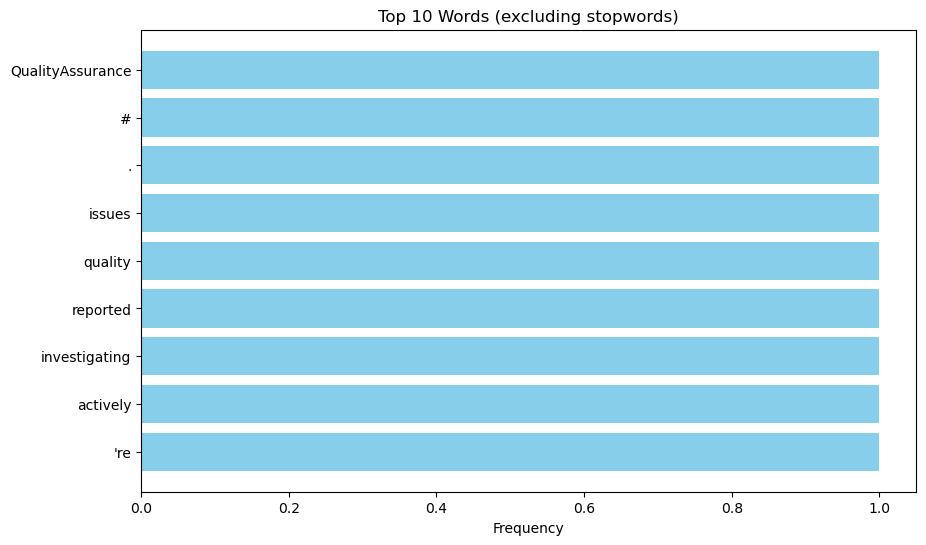

--------------------------------------------------
Stopword analysis for Tweet 49 (Sentiment: Negative):


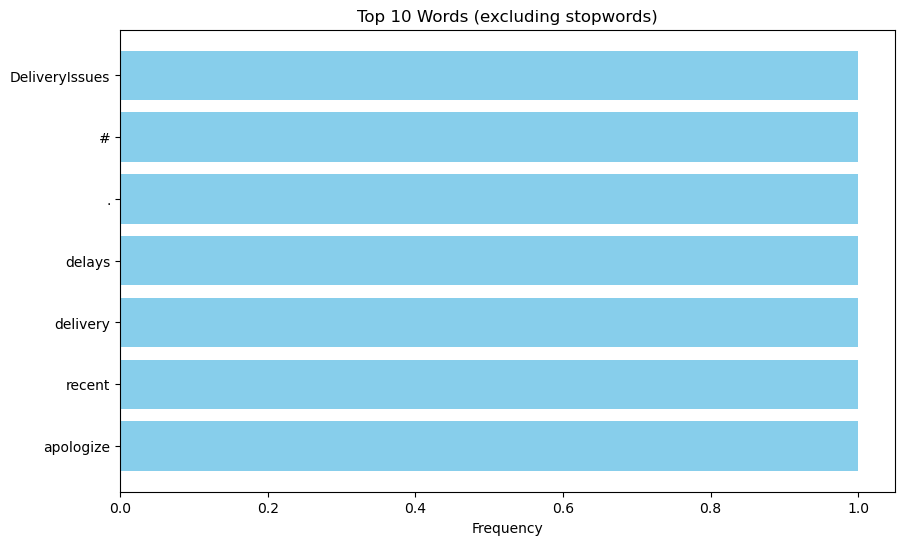

--------------------------------------------------
Stopword analysis for Tweet 50 (Sentiment: Neutral):


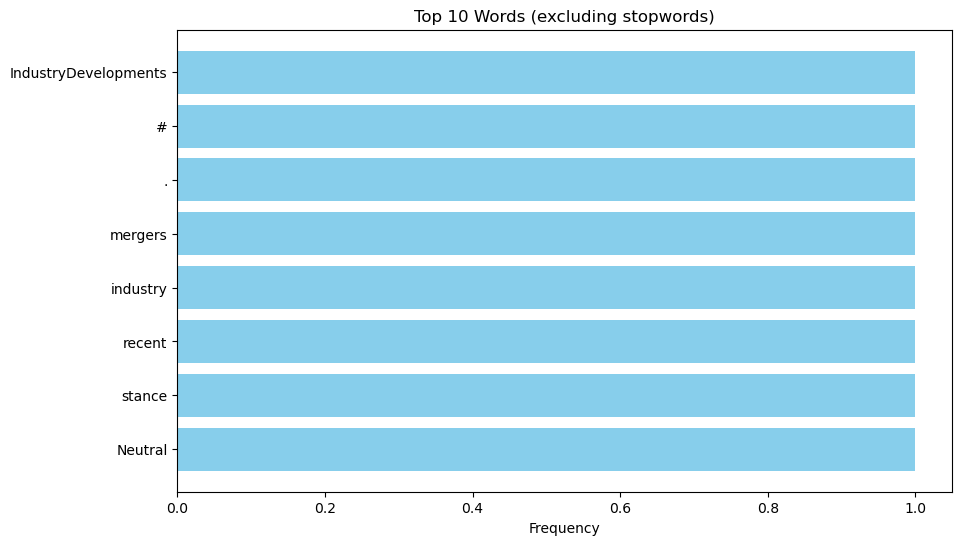

--------------------------------------------------
Stopword analysis for Tweet 51 (Sentiment: Positive):


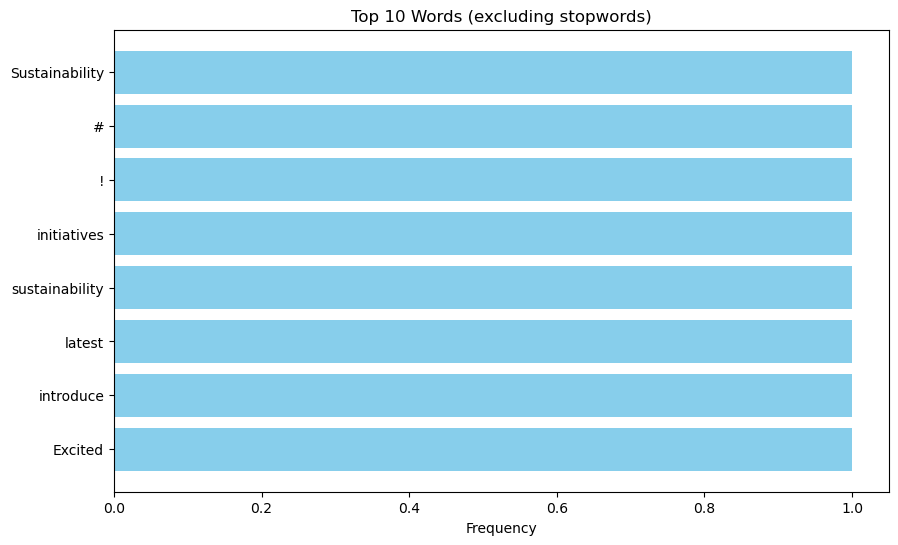

--------------------------------------------------
Stopword analysis for Tweet 52 (Sentiment: Neutral):


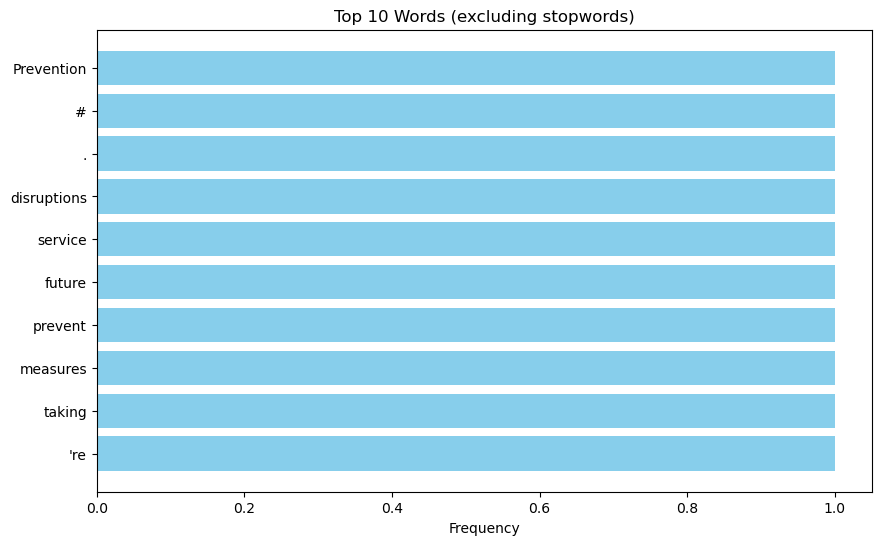

--------------------------------------------------


In [87]:
def stopword_analysis(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Get English stopwords
    stop_words = set(stopwords.words('english'))

    # Count the occurrences of each word excluding stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    word_freq = nltk.FreqDist(filtered_words)

    # Plot the top N words
    top_words = word_freq.most_common(10)
    labels, values = zip(*top_words)

    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')
    plt.title('Top 10 Words (excluding stopwords)')
    plt.xlabel('Frequency')
    plt.show()

# Apply stopword analysis to each tweet
for index, row in df.iterrows():
    print(f"Stopword analysis for Tweet {index + 1} (Sentiment: {row['Sentiment']}):")
    stopword_analysis(row['Tweet Text'])
    print("-" * 50)

Stopword analysis for Positive sentiment:


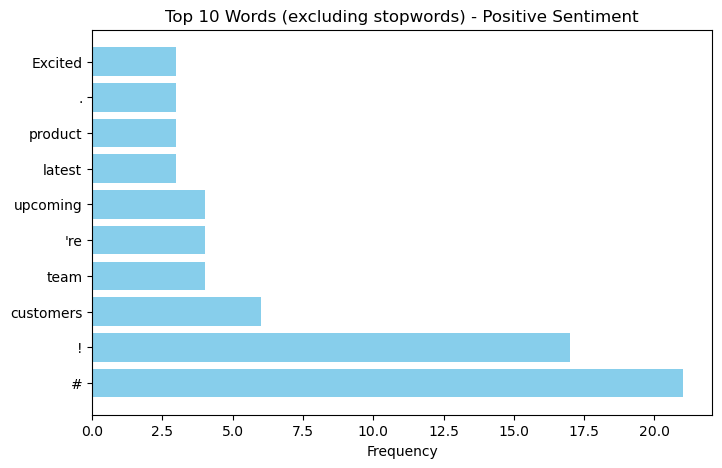

Stopword analysis for Negative sentiment:


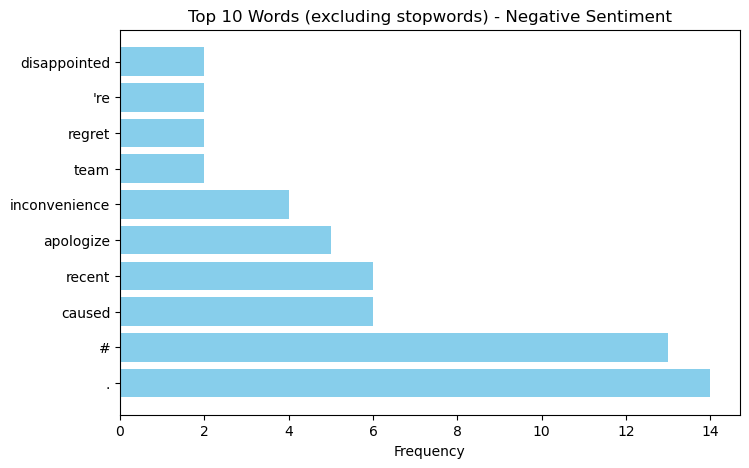

Stopword analysis for Neutral sentiment:


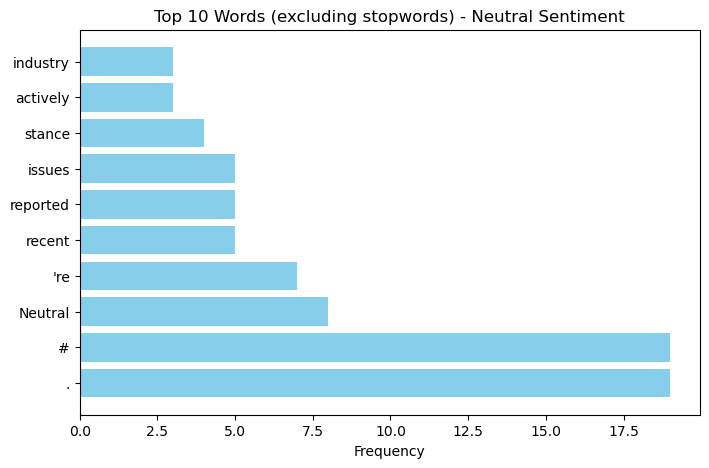

In [94]:

# Analyzing stopwords based on sentiment.


def stopword_analysis_by_sentiment(sentiment):
    # Filter tweets by sentiment
    sentiment_df = df[df['Sentiment'] == sentiment]
    
    # Consolidate text for the specified sentiment
    sentiment_text = ' '.join(sentiment_df['Tweet Text'])

    # Tokenize the text into words
    words = word_tokenize(sentiment_text)

    # Get English stopwords
    stop_words = set(stopwords.words('english'))

    # Count the occurrences of each word excluding stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    word_freq = nltk.FreqDist(filtered_words)

    return word_freq

# Perform stopword analysis for each sentiment
sentiments = df['Sentiment'].unique()
for sentiment in sentiments:
    print(f"Stopword analysis for {sentiment} sentiment:")
    sentiment_word_freq = stopword_analysis_by_sentiment(sentiment)
    
    # Plot the top 10 words
    top_words = sentiment_word_freq.most_common(10)
    labels, values = zip(*top_words)

    plt.figure(figsize=(8, 5))
    plt.barh(labels, values, color='skyblue')
    plt.title(f'Top 10 Words (excluding stopwords) - {sentiment} Sentiment')
    plt.xlabel('Frequency')
    plt.show()


# Sentiment Over Time Analysis

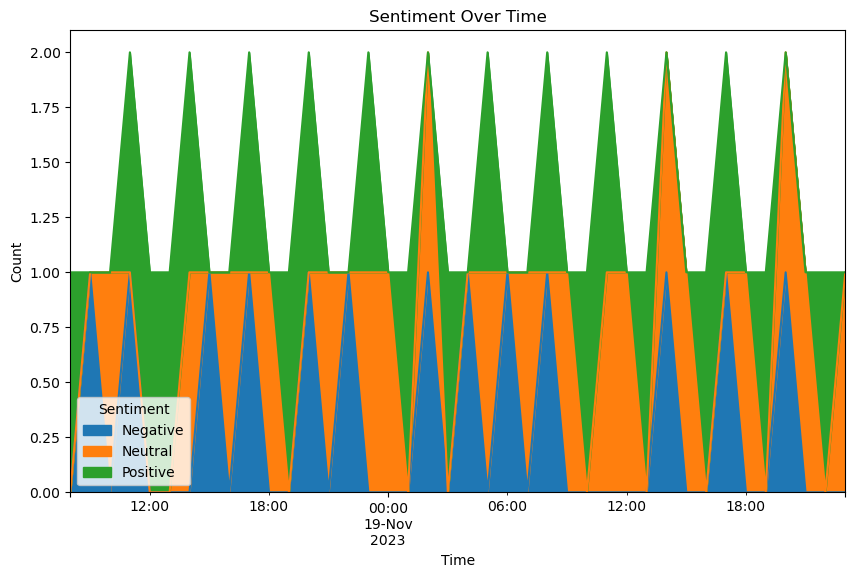

In [88]:
# Sentiment over time, day by day

messages['Timestamp'] = pd.to_datetime(messages['Timestamp'])  # Convert to datetime for proper time handling

# Function to plot sentiment over time
def plot_sentiment_over_time(messages):
    sentiment_counts = messages.resample('H', on='Timestamp')['Sentiment'].value_counts().unstack().fillna(0)
    
    # Plot
    sentiment_counts.plot(kind='area', stacked=True, figsize=(10, 6))
    
    plt.title('Sentiment Over Time')
    plt.xlabel('Time')
    plt.ylabel('Count')
    plt.legend(title='Sentiment')
    plt.show()

# Example usage
plot_sentiment_over_time(messages)

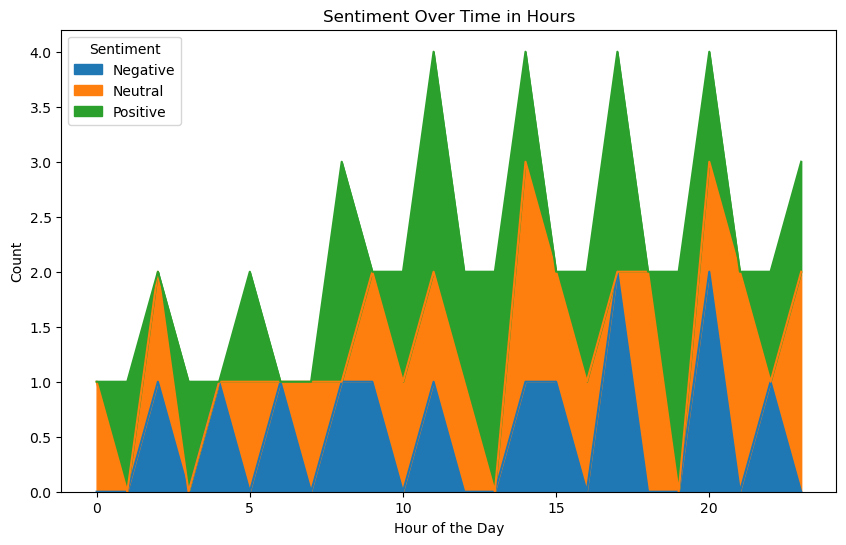

In [89]:
# Sentiment analysis over time, broken down by hour across all days

df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert to datetime for proper time handling

# Function to plot sentiment over time
def plot_sentiment_over_time(df):
    # Convert Timestamp to hours
    df['Hour'] = df['Timestamp'].dt.hour
    sentiment_counts = df.groupby(['Hour', 'Sentiment']).size().unstack(fill_value=0)

    # Plot
    sentiment_counts.plot(kind='area', stacked=True, figsize=(10, 6))

    plt.title('Sentiment Over Time in Hours')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Count')
    plt.legend(title='Sentiment')
    plt.show()

# Example usage
plot_sentiment_over_time(df)

# Correlation analysis

In [97]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import chi2

Accuracy: 0.9090909090909091

Top Features for Positive Sentiment:
Empty DataFrame
Columns: [Feature, Chi2, P-Value]
Index: []

Top Features for Negative Sentiment:
Empty DataFrame
Columns: [Feature, Chi2, P-Value]
Index: []


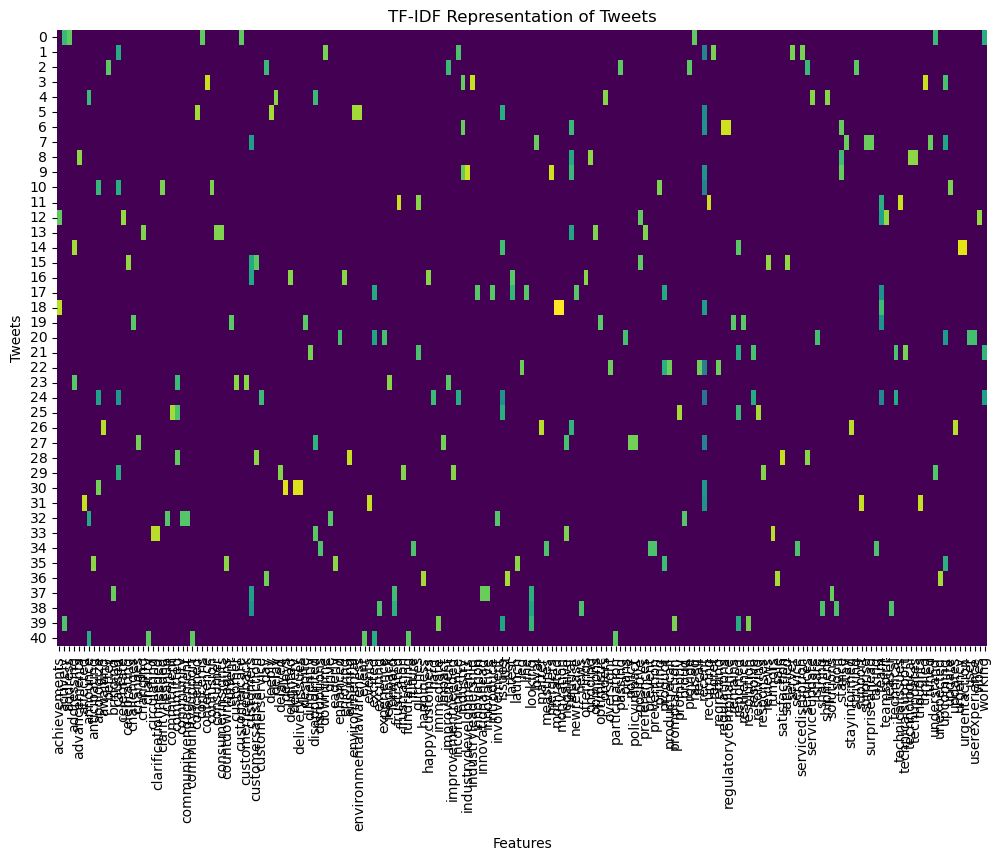

In [98]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(train_df['Tweet Text'])
X_test = vectorizer.transform(test_df['Tweet Text'])

# Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, train_df['Sentiment'])
predictions = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(test_df['Sentiment'], predictions)
print(f"Accuracy: {accuracy}")

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate Chi-square statistic to measure the correlation between features and sentiment
chi2_stat, p_values = chi2(X_train, train_df['Sentiment'])

# Create a DataFrame with feature names, chi2_stat, and p-values
chi2_results = pd.DataFrame({'Feature': feature_names, 'Chi2': chi2_stat, 'P-Value': p_values})

# Display the top correlated features for each sentiment
top_features_positive = chi2_results[chi2_results['P-Value'] < 0.05].nlargest(5, 'Chi2')
top_features_negative = chi2_results[chi2_results['P-Value'] < 0.05].nsmallest(5, 'Chi2')

print("\nTop Features for Positive Sentiment:")
print(top_features_positive)

print("\nTop Features for Negative Sentiment:")
print(top_features_negative)

# Visualize correlation matrices using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.todense(), cmap='viridis', xticklabels=feature_names, cbar=False)
plt.title('TF-IDF Representation of Tweets')
plt.xlabel('Features')
plt.ylabel('Tweets')
plt.show()

In [101]:
df = messages.copy()

vectorizer = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore', stop_words='english')
X = vectorizer.fit_transform(df['Tweet Text'])
y = df['Sentiment']

# Use chi-squared test to find significant features
chi2_results = chi2(X, y)

# Create a DataFrame with feature names, chi-squared values, and p-values
feature_names = vectorizer.get_feature_names_out()
results_df = pd.DataFrame({'Feature': feature_names, 'Chi2': chi2_results[0], 'P-Value': chi2_results[1]})

# Display top features for positive and negative sentiments
top_features_positive = results_df[results_df['P-Value'] < 0.05].nlargest(5, 'Chi2')
top_features_negative = results_df[results_df['P-Value'] < 0.05].nsmallest(5, 'Chi2')

print("Top Features for Positive Sentiment:")
print(top_features_positive)

print("\nTop Features for Negative Sentiment:")
print(top_features_negative)

Top Features for Positive Sentiment:
Empty DataFrame
Columns: [Feature, Chi2, P-Value]
Index: []

Top Features for Negative Sentiment:
Empty DataFrame
Columns: [Feature, Chi2, P-Value]
Index: []


# Reason for the empty dataframe - Need to check

Feature Representation: Ensure that you are using an appropriate feature representation (e.g., Bag-of-Words, TF-IDF) that captures the relevant information for sentiment analysis.

Data Imbalance: Check if your dataset has a balance of positive and negative samples. If one sentiment class is significantly smaller than the other, it may affect the statistical significance of the chi-squared test.

Rare Features: If certain features are rare or appear only in specific sentiments, they might not contribute much to the chi-squared test. You can try adjusting the parameters or considering different features.

Preprocessing: Make sure that your text data is properly preprocessed, including tokenization, stemming, and removal of stop words.

# Error Analysis

In [132]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report


# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(train_df['Tweet Text'])
X_test = vectorizer.transform(test_df['Tweet Text'])

# Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, train_df['Sentiment'])
predictions = classifier.predict(X_test)

# Error Analysis
conf_matrix = confusion_matrix(test_df['Sentiment'], predictions)
classification_rep = classification_report(test_df['Sentiment'], predictions)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_rep)



Confusion Matrix:
[[3 0 0]
 [0 4 1]
 [0 0 3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.80      0.89         5
           2       0.75      1.00      0.86         3

    accuracy                           0.91        11
   macro avg       0.92      0.93      0.92        11
weighted avg       0.93      0.91      0.91        11



# Word2Vec

In [109]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

df = pd.read_csv("Data Scientist Ultra project Data - Twitter- Project 1 .csv")

# Tokenization using NLTK
stop_words = set(stopwords.words('english'))

def preprocess_text(text): # Preprocessing
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, URLs, and user mentions
    text = re.sub(r'https?://\S+|www\.\S+|@[^\s]+', '', text)
    text = re.sub(r'\s+', ' ', text)
    # Tokenize using NLTK
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Applying tokenization to the 'Tweet Text' column
df['tokens'] = df['Tweet Text'].apply(preprocess_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tweet Text'])

# Display TF-IDF features
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())
print("Feature Names:", tfidf_vectorizer.get_feature_names_out())
print()

# Word Embeddings (Word2Vec)
word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Display Word2Vec vectors for the first tweet
print("Word2Vec Vectors for the first tweet:")
print(word2vec_model.wv[df['tokens'].iloc[0]])

# Saving the model
word2vec_model.save("word2vec_model.model")


TF-IDF Matrix:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.25378819 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Feature Names: ['about' 'achievements' 'actively' 'address' 'addressing' 'advancements'
 'affected' 'all' 'and' 'announce' 'anticipating' 'any' 'apologize'
 'apology' 'are' 'around' 'as' 'awaiting' 'be' 'bear' 'better' 'bringing'
 'by' 'caused' 'celebrate' 'celebrating' 'challenges' 'changes' 'changing'
 'charity' 'circulating' 'clarificationneeded' 'clarityneeded' 'cleanup'
 'commitment' 'committed' 'community' 'communityengagement'
 'communitysupport' 'concerned' 'concerns' 'conference' 'confusion'
 'consumer' 'consumerinsights' 'con

# Logistic regression model

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Use CountVectorizer to convert text data into a bag-of-words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['Tweet Text'])
X_test = vectorizer.transform(test_data['Tweet Text'])

# Map sentiment labels to numerical values
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train = train_data['Sentiment'].map(sentiment_mapping)
y_test = test_data['Sentiment'].map(sentiment_mapping)

# Build a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Accuracy: 0.8182
Precision: 0.8909
Recall: 0.8182
F1 Score: 0.8268

Confusion Matrix:
[[2 0 1]
 [0 4 1]
 [0 0 3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.80      0.89         5
           2       0.60      1.00      0.75         3

    accuracy                           0.82        11
   macro avg       0.87      0.82      0.81        11
weighted avg       0.89      0.82      0.83        11



# Deep Learning models

In [138]:
#BertForSequenceClassification

In [111]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tqdm import tqdm


# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['Sentiment'].unique()))

# Tokenize and encode the training data
train_encodings = tokenizer(list(train_data['Tweet Text']), truncation=True, padding=True, max_length=128, return_tensors='pt', add_special_tokens=True)
train_labels = torch.tensor(train_data['Sentiment'].map(sentiment_mapping).values)

# Tokenize and encode the testing data
test_encodings = tokenizer(list(test_data['Tweet Text']), truncation=True, padding=True, max_length=128, return_tensors='pt', add_special_tokens=True)
test_labels = torch.tensor(test_data['Sentiment'].map(sentiment_mapping).values)

# Create DataLoader for training and testing data
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Set up training parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc='Evaluating'):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

conf_matrix = confusion_matrix(all_labels, all_preds)
class_report = classification_report(all_labels, all_preds)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\rajes\anaconda3\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Evaluating: 100%|████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.80it/s]

Accuracy: 0.7273
Precision: 0.7121
Recall: 0.7273
F1 Score: 0.7124

Confusion Matrix:
[[1 2 0]
 [1 4 0]
 [0 0 3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.67      0.80      0.73         5
           2       1.00      1.00      1.00         3

    accuracy                           0.73        11
   macro avg       0.72      0.71      0.71        11
weighted avg       0.71      0.73      0.71        11



# LSTM model

In [123]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Preprocess the data
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_words = 5000
max_len = 50

tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(train_data['Tweet Text'].values)

X_train = tokenizer.texts_to_sequences(train_data['Tweet Text'].values)
X_train = pad_sequences(X_train, maxlen=max_len)

X_test = tokenizer.texts_to_sequences(test_data['Tweet Text'].values)
X_test = pad_sequences(X_test, maxlen=max_len)

# Build the LSTM model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 5
history = model.fit(X_train, train_data['Sentiment'].values, validation_split=0.1, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_data['Sentiment'].values

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)



Epoch 1/5
2/2 [==============================] - 5s 842ms/step - loss: 1.0989 - accuracy: 0.2778 - val_loss: 1.0843 - val_accuracy: 0.8000
Epoch 2/5
2/2 [==============================] - 0s 115ms/step - loss: 1.0865 - accuracy: 0.6389 - val_loss: 1.0785 - val_accuracy: 1.0000
Epoch 3/5
2/2 [==============================] - 0s 141ms/step - loss: 1.0761 - accuracy: 0.8056 - val_loss: 1.0663 - val_accuracy: 1.0000
Epoch 4/5
2/2 [==============================] - 0s 112ms/step - loss: 1.0623 - accuracy: 0.8611 - val_loss: 1.0494 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 483ms/step
Accuracy: 0.6364
Precision: 0.5000
Recall: 0.6364
F1 Score: 0.5455

Confusion Matrix:
[[0 1 2]
 [0 4 1]
 [0 0 3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.80      0.80      0.80         5
           2       0.50      1.00      0.67         3

    accuracy             

C:\Users\rajes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajes\anaconda3\lib\site-packages\sklearn\metrics\_classifi

In [113]:
# Analyze misclassifications
misclassifications = test_data[test_data['Sentiment'] != y_pred]
print("\nMisclassifications:")
print(misclassifications[['Tweet Text', 'Sentiment']])


Misclassifications:
                                           Tweet Text  Sentiment
41  Neutral opinions on the current economic forec...          1
12  We deeply regret the inconvenience caused by t...          0
43  We apologize for any inconvenience caused by t...          0
17  Please bear with us as we work on improving ou...          1
32  We apologize for any delays in responding to y...          0


# Hyperparameter tuning

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

# Define the hyperparameters and their possible values to search
parameters = {
    'tfidf__max_features': [1000, 5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
}


# Perform the grid search
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


C:\Users\rajes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rajes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajes\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\rajes\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\rajes\anac

AttributeError: 'numpy.ndarray' object has no attribute 'lower'